In [1]:
#Import

import numpy as np
import matplotlib.pyplot as plt
from biasmodels import MagnificationBias, GalaxyBias, EvolutionBias
from getdist import plots
from getdist.gaussian_mixtures import GaussianND
import fishermat as fm
import pickle as pk
import pandas as pd

#Set current directory
import os
import sys

PACKAGE_PARENT = '..'
SCRIPT_DIR = os.path.dirname(os.path.realpath(os.path.join(os.getcwd())))
sys.path.append(SCRIPT_DIR)
print(SCRIPT_DIR)

#Configuration
large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)

plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

/Users/danielsb/Documents/GitHub


In [2]:
# Redshift bins

z_bins = np.array([0.15, 0.25, 0.35, 0.45, 0.55, 0.65, 0.75, 0.85, 0.95, 1.05, 1.15, 1.25, 1.35, 1.45, 1.55, 1.65, 1.75, 1.85, 1.95])

# Separations

dist = [
    np.arange(20, 164, 4),
    np.arange(32, 164, 4),
]

params_dict0 = {
    'h' : 0.6766,
    'As' : 2.05e-9,
    'ns' : 0.9665,
    'Ob' : 0.04897, # This is here the density parameter of Baryons
    'Om' : 0.3111, # This is here the density parameter of Cold Dark Matter
}

steps = [1e-3, 1e-1, 1e-4, 1e-2, 1e-2]

# DERIVATIVES

In [3]:
with open('derivatives.pkl', 'rb') as File:
    derivatives_dict = pk.load(File)
    
derivatives_50x50 = derivatives_dict['split_50x50']
derivatives_30x70 = derivatives_dict['split_30x70']
derivatives_70x30 = derivatives_dict['split_70x30']

$30\times 70$ SPLIT

In [4]:
dsignal_dsbias_30x70 = derivatives_30x70['dsignal_dsbias']

dsignal_dgbias_30x70 =  derivatives_30x70['dsignal_dgbias']

dsignal_dcosmic_30x70 =  derivatives_30x70['dsignal_dcosmic']

dsignal_dnum_fit_30x70 =  derivatives_30x70['dsignal_dnumev']

np.shape(dsignal_dsbias_30x70), np.shape(dsignal_dgbias_30x70), np.shape(dsignal_dcosmic_30x70)

((8, 19, 324), (4, 19, 324), (5, 19, 324))

In [5]:
dsignal_dtheta_30x70 = np.concatenate([ dsignal_dsbias_30x70, dsignal_dnum_fit_30x70, dsignal_dgbias_30x70, dsignal_dcosmic_30x70 ])

np.shape(dsignal_dtheta_30x70)

(21, 19, 324)

$50\times 50$ SPLIT

In [6]:
dsignal_dsbias_50x50 = derivatives_50x50['dsignal_dsbias']

dsignal_dgbias_50x50 =  derivatives_50x50['dsignal_dgbias']

dsignal_dcosmic_50x50 =  derivatives_50x50['dsignal_dcosmic']

dsignal_dnum_fit_50x50 =  derivatives_50x50['dsignal_dnumev']

np.shape(dsignal_dsbias_50x50), np.shape(dsignal_dgbias_50x50), np.shape(dsignal_dcosmic_50x50)

((8, 19, 324), (4, 19, 324), (5, 19, 324))

In [7]:
dsignal_dtheta_50x50 = np.concatenate([ dsignal_dsbias_50x50, dsignal_dnum_fit_50x50, dsignal_dgbias_50x50, dsignal_dcosmic_50x50 ])

np.shape(dsignal_dtheta_50x50)

(21, 19, 324)

$70\times 30$ SPLIT

In [8]:
dsignal_dsbias_70x30 = derivatives_70x30['dsignal_dsbias']

dsignal_dgbias_70x30 =  derivatives_70x30['dsignal_dgbias']

dsignal_dcosmic_70x30 =  derivatives_70x30['dsignal_dcosmic']

dsignal_dnum_fit_70x30 =  derivatives_70x30['dsignal_dnumev']

np.shape(dsignal_dsbias_70x30), np.shape(dsignal_dgbias_70x30), np.shape(dsignal_dcosmic_70x30)

((8, 19, 324), (4, 19, 324), (5, 19, 324))

In [9]:
dsignal_dtheta_70x30 = np.concatenate([ dsignal_dsbias_70x30, dsignal_dnum_fit_70x30, dsignal_dgbias_70x30, dsignal_dcosmic_70x30 ])

np.shape(dsignal_dtheta_70x30)

(21, 19, 324)

# COVARIANCE MATRIX

PRIORS

In [10]:
# Create the PRIORS Cov Matrix for sB, sF, nevol

errB = [9e-1, 9e-1] 
errF = [9e-1, 9e-1]

sB_30  = np.array([0.32517608, 0.64417726, 0.16141884, 0.13330365])
sB_50  = np.array([-0.90110744,  1.82300203, -1.01878439, -0.30342324])
sB_70  = np.array([-0.93372809,  1.82432411, -0.92835543, -0.24102824])


sF = np.array([-0.19376095,  1.0747336,  -0.07806247, -0.00558005])
nevol = np.array([7.94599875, -12.03752387,   2.29927261, -15.83887369])

dsB_30 = sB_30 * errB[0]
dsB_50 = sB_50 * errB[0]
dsB_70 = sB_70 * errB[0]
 
dsF = sF * errF[0]

dnum = nevol * errB[1]

Cov_all_30 = np.diag(np.concatenate([dsB_30**2, dsF**2, dnum**2]))
Cov_all_50 = np.diag(np.concatenate([dsB_50**2, dsF**2, dnum**2]))
Cov_all_70 = np.diag(np.concatenate([dsB_70**2, dsF**2, dnum**2]))

Inv_Cov_all_30 = np.linalg.inv(Cov_all_30)
Inv_Cov_all_50 = np.linalg.inv(Cov_all_50)
Inv_Cov_all_70 = np.linalg.inv(Cov_all_70)

Inv_Cov_prior_30 = np.zeros([len(dsignal_dtheta_30x70), len(dsignal_dtheta_30x70)])
Inv_Cov_prior_50 = np.zeros([len(dsignal_dtheta_50x50), len(dsignal_dtheta_50x50)])
Inv_Cov_prior_70 = np.zeros([len(dsignal_dtheta_70x30), len(dsignal_dtheta_70x30)])

Inv_Cov_prior_30[:len(Inv_Cov_all_30), :len(Inv_Cov_all_30)] = Inv_Cov_all_30
Inv_Cov_prior_50[:len(Inv_Cov_all_50), :len(Inv_Cov_all_50)] = Inv_Cov_all_50
Inv_Cov_prior_70[:len(Inv_Cov_all_70), :len(Inv_Cov_all_70)] = Inv_Cov_all_70

np.shape(Cov_all_30), np.shape(Inv_Cov_prior_30), np.shape(Inv_Cov_prior_50), np.shape(Inv_Cov_prior_70)

((12, 12), (21, 21), (21, 21), (21, 21))

MULTIPOLES

In [11]:
Inv_Cov_multipoles_30x70 = fm.inverse_cov_matrix_survey(d = dist[0], z_bins = z_bins, split=[30, 70], small_off_diagonal=True, rtol=1e-4)
Inv_Cov_multipoles_50x50 = fm.inverse_cov_matrix_survey(d = dist[0], z_bins = z_bins, split=[50, 50], small_off_diagonal=True, rtol=1e-4)
Inv_Cov_multipoles_70x30 = fm.inverse_cov_matrix_survey(d = dist[0], z_bins = z_bins, split=[70, 30], small_off_diagonal=True, rtol=1e-4)

np.shape(Inv_Cov_multipoles_30x70), np.shape(Inv_Cov_multipoles_50x50), np.shape(Inv_Cov_multipoles_70x30)


 ... Loading Covariance Matrices [MONOBB, MONOBF, MONOFF, DIPBF, QUADBB, QUADBF, QUADFF, HEXAT, OCTBF] ... 

Population splitted in 30% BRIGHT - 70% FAINT 


 ... Computing the Inverse [MONOBB, MONOBF, MONOFF, DIPBF, QUADBB, QUADBF, QUADFF, HEXAT, OCTBF] ... 

---------------------------------------- DONE. ---------------------------------------- 


 ... Loading Covariance Matrices [MONOBB, MONOBF, MONOFF, DIPBF, QUADBB, QUADBF, QUADFF, HEXAT, OCTBF] ... 

Population splitted in 50% BRIGHT - 50% FAINT 


 ... Computing the Inverse [MONOBB, MONOBF, MONOFF, DIPBF, QUADBB, QUADBF, QUADFF, HEXAT, OCTBF] ... 

---------------------------------------- DONE. ---------------------------------------- 


 ... Loading Covariance Matrices [MONOBB, MONOBF, MONOFF, DIPBF, QUADBB, QUADBF, QUADFF, HEXAT, OCTBF] ... 

Population splitted in 70% BRIGHT - 30% FAINT 


 ... Computing the Inverse [MONOBB, MONOBF, MONOFF, DIPBF, QUADBB, QUADBF, QUADFF, HEXAT, OCTBF] ... 

----------------------------------

((19, 324, 324), (19, 324, 324), (19, 324, 324))

# FISHER ANALYSIS

FISHER MATRICES

In [12]:
Fisher_Matrix_30x70_ = fm.fisher_matrix(d_signal = dsignal_dtheta_30x70, inv_cov = Inv_Cov_multipoles_30x70, z_bins = z_bins)
Fisher_Matrix_30x70 = Fisher_Matrix_30x70_ + Inv_Cov_prior_30

Fisher_Matrix_50x50_ = fm.fisher_matrix(d_signal = dsignal_dtheta_50x50, inv_cov = Inv_Cov_multipoles_50x50, z_bins = z_bins)
Fisher_Matrix_50x50 = Fisher_Matrix_50x50_ + Inv_Cov_prior_50

Fisher_Matrix_70x30_ = fm.fisher_matrix(d_signal = dsignal_dtheta_70x30, inv_cov = Inv_Cov_multipoles_70x30, z_bins = z_bins)
Fisher_Matrix_70x30 = Fisher_Matrix_70x30_ + Inv_Cov_prior_70

np.shape(Fisher_Matrix_30x70), np.shape(Fisher_Matrix_50x50), np.shape(Fisher_Matrix_70x30)


 ... Computing the Fisher Matrix ... 

Signal & Cov must be given as functions (z,d) and (z,d,d') respectively. 


 ... Success! ... 


 ... Computing the Fisher Matrix ... 

Signal & Cov must be given as functions (z,d) and (z,d,d') respectively. 


 ... Success! ... 


 ... Computing the Fisher Matrix ... 

Signal & Cov must be given as functions (z,d) and (z,d,d') respectively. 


 ... Success! ... 



((21, 21), (21, 21), (21, 21))

PARAMETERS COVARIANCES

In [13]:
Sigma_Matrix_30x70 = np.linalg.inv(Fisher_Matrix_30x70)
Sigma_Matrix_50x50 = np.linalg.inv(Fisher_Matrix_50x50)
Sigma_Matrix_70x30 = np.linalg.inv(Fisher_Matrix_70x30)

In [14]:
np.linalg.det(Sigma_Matrix_30x70), np.linalg.det(Sigma_Matrix_50x50), np.linalg.det(Sigma_Matrix_70x30)

(9.190410561858482e-77, 2.169347900406378e-76, 5.243582780058152e-77)

CONSTRAINTS

In [15]:
#Absolute Errors

Abs_Errors_30x70 = np.sqrt(np.diag(Sigma_Matrix_30x70))
Abs_Errors_50x50 = np.sqrt(np.diag(Sigma_Matrix_50x50))
Abs_Errors_70x30 = np.sqrt(np.diag(Sigma_Matrix_70x30))

# Fiducial values

sbias_30 = np.concatenate([sB_30, sF])
sbias_50 = np.concatenate([sB_50, sF])
sbias_70 = np.concatenate([sB_70, sF])

gbias_fid = np.concatenate([np.array([0.554, 0.783]), np.array([0.554, 0.783])])
cosmic_fid = np.fromiter(params_dict0.values(), dtype=float)
cosmic_fid[1] = np.log(10**10 * cosmic_fid[1])

params_30 = np.concatenate([sbias_30, nevol, gbias_fid, cosmic_fid])
params_50 = np.concatenate([sbias_50, nevol, gbias_fid, cosmic_fid])
params_70 = np.concatenate([sbias_70, nevol, gbias_fid, cosmic_fid])


# Relative errors

Rel_Errors_30x70 = np.abs(Abs_Errors_30x70/params_30)
Rel_Errors_50x50 = np.abs(Abs_Errors_50x50/params_50)
Rel_Errors_70x30 = np.abs(Abs_Errors_70x30/params_70)

# % CONSTRAINTS

params_errors_30x70 = Rel_Errors_30x70 * 100
params_errors_50x50 = Rel_Errors_50x50 * 100
params_errors_70x30 = Rel_Errors_70x30 * 100

Store results in DataFrames

In [16]:
constraints_sB = {
    '30x70' : params_errors_30x70[:4],
    '50x50' : params_errors_50x50[:4],
    '70x30' : params_errors_70x30[:4]
}

row_names = {
    0: "sB_0",
    1: "sB_1",
    2: "sB_2",
    3: "sB_3",
}

df_sB = pd.DataFrame(constraints_sB, index=row_names.values())

df_sB = df_sB.apply(pd.Series.round, args=[2])

In [17]:
df_sB

30x70  50x50  70x30
sB_0  51.02  47.19  35.01
sB_1  60.15  29.51  24.20
sB_2  77.28  40.68  35.77
sB_3  32.57  38.12  41.83

In [18]:
constraints_sM = {
    '30x70' : params_errors_30x70[4:8],
    '50x50' : params_errors_50x50[4:8],
    '70x30' : params_errors_70x30[4:8]
}

row_names = {
    0: "sM_0",
    1: "sM_1",
    2: "sM_2",
    3: "sM_3",
}

df_sM = pd.DataFrame(constraints_sM, index=row_names.values())
df_sM = df_sM.apply(pd.Series.round, args=[2])

In [19]:
df_sM

30x70  50x50  70x30
sM_0  63.38  68.72  64.44
sM_1  31.23  47.69  38.72
sM_2  81.37  79.36  70.24
sM_3  89.89  89.87  89.60

In [20]:
constraints_nevol = {
    '30x70' : params_errors_30x70[8:12],
    '50x50' : params_errors_50x50[8:12],
    '70x30' : params_errors_70x30[8:12]
}

row_names = {
    0: "n_0",
    1: "n_1",
    2: "n_2",
    3: "n_3",
}

df_nevol = pd.DataFrame(constraints_nevol, index=row_names.values())
df_nevol = df_nevol.apply(pd.Series.round, args=[2])

In [21]:
df_nevol

30x70  50x50  70x30
n_0  71.08  72.76  73.66
n_1  43.74  50.33  48.04
n_2  29.82  32.25  35.72
n_3  47.93  50.72  51.22

In [22]:
constraints_gbias = {
    '30x70' : params_errors_30x70[12:16],
    '50x50' : params_errors_50x50[12:16],
    '70x30' : params_errors_70x30[12:16]
}

row_names = {
    0: "b1B",
    1: "b2B",
    2: "b1F",
    3: "b2F",
}

df_gbias = pd.DataFrame(constraints_gbias, index=row_names.values())
df_gbias = df_gbias.apply(pd.Series.round, args=[2])

In [23]:
df_gbias

30x70  50x50  70x30
b1B   0.29   0.26   0.22
b2B   0.41   0.39   0.37
b1F   0.21   0.24   0.25
b2F   0.27   0.31   0.36

In [24]:
constraints_cosmic = {
    '30x70' : params_errors_30x70[16:],
    '50x50' : params_errors_50x50[16:],
    '70x30' : params_errors_70x30[16:]
}

row_names = {
    0: "h",
    1: "ln(10^10 As)",
    2: "n_s",
    3: "Ob",
    4: "Om"
}

df_cosmic = pd.DataFrame(constraints_cosmic, index=row_names.values())
df_cosmic = df_cosmic.apply(pd.Series.round, args=[2])

In [25]:
df_cosmic

30x70  50x50  70x30
h              1.13   1.32   1.57
ln(10^10 As)   0.62   0.75   0.93
n_s            0.92   1.11   1.36
Ob             1.28   1.40   1.57
Om             0.42   0.56   0.71

STORE IN A DATA FRAME

In [26]:
params_names = ['sB_0', 'sB_1', 'sB_2', 'sB_3', 
                'sM_0', 'sM_1', 'sM_2', 'sM_3', 
                'n_0', 'n_1', 'n_2', 'n_3',
                'b1B', 'b2B', 'b1F', 'b2F',
                'h', 'ln(10^10 As)', 'n_s', 'Ob', 'Om']

all_params_30_dict = {}
all_params_50_dict = {}
all_params_70_dict = {}

for i, key in enumerate(params_names):
    all_params_30_dict[key] = [params_30[i], Rel_Errors_30x70[i], params_errors_30x70[i]]
    all_params_50_dict[key] = [params_50[i], Rel_Errors_50x50[i], params_errors_50x50[i]]
    all_params_70_dict[key] = [params_70[i], Rel_Errors_70x30[i], params_errors_70x30[i]]

In [27]:
df_30x70 = pd.DataFrame(all_params_30_dict, index=['Fiducial', 'Rel_Error', '%'])
df_50x50 = pd.DataFrame(all_params_50_dict, index=['Fiducial', 'Rel_Error', '%'])
df_70x30 = pd.DataFrame(all_params_70_dict, index=['Fiducial', 'Rel_Error', '%'])

df_70x30

sB_0       sB_1       sB_2       sB_3       sM_0       sM_1   
Fiducial   -0.933728   1.824324  -0.928355  -0.241028  -0.193761   1.074734  \
Rel_Error   0.350088   0.242044   0.357712   0.418255   0.644370   0.387221   
%          35.008850  24.204445  35.771205  41.825482  64.437009  38.722125   

                sM_2       sM_3        n_0        n_1  ...        n_3   
Fiducial   -0.078062  -0.005580   7.945999 -12.037524  ... -15.838874  \
Rel_Error   0.702434   0.896018   0.736642   0.480391  ...   0.512219   
%          70.243438  89.601846  73.664230  48.039134  ...  51.221912   

                b1B       b2B       b1F       b2F         h  ln(10^10 As)   
Fiducial   0.554000  0.783000  0.554000  0.783000  0.676600      3.020425  \
Rel_Error  0.002226  0.003693  0.002548  0.003554  0.015741      0.009259   
%          0.222596  0.369311  0.254777  0.355377  1.574150      0.925871   

                n_s        Ob        Om  
Fiducial   0.966500  0.048970  0.311100  
Rel_Error  0.013625  0.015717  0.007148  
%          1.362493  1.571692  0.714819  

[3 rows x 21 columns]

In [28]:
combined_df = pd.concat([df_30x70, df_50x50, df_70x30], ignore_index=True)

combined_df

sB_0       sB_1       sB_2       sB_3       sM_0       sM_1   
0   0.325176   0.644177   0.161419   0.133304  -0.193761   1.074734  \
1   0.510229   0.601545   0.772809   0.325728   0.633792   0.312298   
2  51.022947  60.154466  77.280945  32.572827  63.379239  31.229813   
3  -0.901107   1.823002  -1.018784  -0.303423  -0.193761   1.074734   
4   0.471919   0.295113   0.406802   0.381179   0.687243   0.476853   
5  47.191862  29.511264  40.680199  38.117874  68.724349  47.685302   
6  -0.933728   1.824324  -0.928355  -0.241028  -0.193761   1.074734   
7   0.350088   0.242044   0.357712   0.418255   0.644370   0.387221   
8  35.008850  24.204445  35.771205  41.825482  64.437009  38.722125   

        sM_2       sM_3        n_0        n_1  ...        n_3       b1B   
0  -0.078062  -0.005580   7.945999 -12.037524  ... -15.838874  0.554000  \
1   0.813703   0.898911   0.710756   0.437399  ...   0.479255  0.002855   
2  81.370260  89.891119  71.075566  43.739865  ...  47.925466  0.285515   
3  -0.078062  -0.005580   7.945999 -12.037524  ... -15.838874  0.554000   
4   0.793604   0.898741   0.727650   0.503305  ...   0.507226  0.002591   
5  79.360366  89.874125  72.764950  50.330480  ...  50.722567  0.259092   
6  -0.078062  -0.005580   7.945999 -12.037524  ... -15.838874  0.554000   
7   0.702434   0.896018   0.736642   0.480391  ...   0.512219  0.002226   
8  70.243438  89.601846  73.664230  48.039134  ...  51.221912  0.222596   

        b2B       b1F       b2F         h  ln(10^10 As)       n_s        Ob   
0  0.783000  0.554000  0.783000  0.676600      3.020425  0.966500  0.048970  \
1  0.004099  0.002129  0.002689  0.011327      0.006185  0.009182  0.012783   
2  0.409899  0.212924  0.268886  1.132739      0.618490  0.918242  1.278299   
3  0.783000  0.554000  0.783000  0.676600      3.020425  0.966500  0.048970   
4  0.003887  0.002371  0.003078  0.013232      0.007476  0.011132  0.013971   
5  0.388719  0.237077  0.307793  1.323180      0.747587  1.113188  1.397063   
6  0.783000  0.554000  0.783000  0.676600      3.020425  0.966500  0.048970   
7  0.003693  0.002548  0.003554  0.015741      0.009259  0.013625  0.015717   
8  0.369311  0.254777  0.355377  1.574150      0.925871  1.362493  1.571692   

         Om  
0  0.311100  
1  0.004212  
2  0.421245  
3  0.311100  
4  0.005564  
5  0.556438  
6  0.311100  
7  0.007148  
8  0.714819  

[9 rows x 21 columns]

In [29]:
results_30x70_dict = {
    'Fiducial 30x70' : params_30,
    #'Rel_Errors' : Rel_Errors_30x70,
    'Error (%)' : params_errors_30x70,
}

results_50x50_dict = {
    'Fiducial 50x50' : params_50,
    #'Rel_Errors' : Rel_Errors_50x50,
    'Error (%)' : params_errors_50x50,
}

results_70x30_dict = {
    'Fiducial 70x30' : params_70,
    #'Rel_Errors' : Rel_Errors_70x30,
    'Error (%)' : params_errors_70x30,
}

df_results_30x70 = pd.DataFrame(results_30x70_dict, index=params_names)
df_results_50x50 = pd.DataFrame(results_50x50_dict, index=params_names)
df_results_70x30 = pd.DataFrame(results_70x30_dict, index=params_names)

df_all_results = pd.concat([df_results_30x70, df_results_50x50, df_results_70x30], ignore_index=False, axis=1)

df_all_results


Fiducial 30x70  Error (%)  Fiducial 50x50  Error (%)   
sB_0                0.325176  51.022947       -0.901107  47.191862  \
sB_1                0.644177  60.154466        1.823002  29.511264   
sB_2                0.161419  77.280945       -1.018784  40.680199   
sB_3                0.133304  32.572827       -0.303423  38.117874   
sM_0               -0.193761  63.379239       -0.193761  68.724349   
sM_1                1.074734  31.229813        1.074734  47.685302   
sM_2               -0.078062  81.370260       -0.078062  79.360366   
sM_3               -0.005580  89.891119       -0.005580  89.874125   
n_0                 7.945999  71.075566        7.945999  72.764950   
n_1               -12.037524  43.739865      -12.037524  50.330480   
n_2                 2.299273  29.818586        2.299273  32.245048   
n_3               -15.838874  47.925466      -15.838874  50.722567   
b1B                 0.554000   0.285515        0.554000   0.259092   
b2B                 0.783000   0.409899        0.783000   0.388719   
b1F                 0.554000   0.212924        0.554000   0.237077   
b2F                 0.783000   0.268886        0.783000   0.307793   
h                   0.676600   1.132739        0.676600   1.323180   
ln(10^10 As)        3.020425   0.618490        3.020425   0.747587   
n_s                 0.966500   0.918242        0.966500   1.113188   
Ob                  0.048970   1.278299        0.048970   1.397063   
Om                  0.311100   0.421245        0.311100   0.556438   

              Fiducial 70x30  Error (%)  
sB_0               -0.933728  35.008850  
sB_1                1.824324  24.204445  
sB_2               -0.928355  35.771205  
sB_3               -0.241028  41.825482  
sM_0               -0.193761  64.437009  
sM_1                1.074734  38.722125  
sM_2               -0.078062  70.243438  
sM_3               -0.005580  89.601846  
n_0                 7.945999  73.664230  
n_1               -12.037524  48.039134  
n_2                 2.299273  35.722183  
n_3               -15.838874  51.221912  
b1B                 0.554000   0.222596  
b2B                 0.783000   0.369311  
b1F                 0.554000   0.254777  
b2F                 0.783000   0.355377  
h                   0.676600   1.574150  
ln(10^10 As)        3.020425   0.925871  
n_s                 0.966500   1.362493  
Ob                  0.048970   1.571692  
Om                  0.311100   0.714819

In [30]:
df_all_results  = df_all_results.apply(pd.Series.round, args=[5], )

df_all_results

Fiducial 30x70  Error (%)  Fiducial 50x50  Error (%)   
sB_0                 0.32518   51.02295        -0.90111   47.19186  \
sB_1                 0.64418   60.15447         1.82300   29.51126   
sB_2                 0.16142   77.28094        -1.01878   40.68020   
sB_3                 0.13330   32.57283        -0.30342   38.11787   
sM_0                -0.19376   63.37924        -0.19376   68.72435   
sM_1                 1.07473   31.22981         1.07473   47.68530   
sM_2                -0.07806   81.37026        -0.07806   79.36037   
sM_3                -0.00558   89.89112        -0.00558   89.87413   
n_0                  7.94600   71.07557         7.94600   72.76495   
n_1                -12.03752   43.73987       -12.03752   50.33048   
n_2                  2.29927   29.81859         2.29927   32.24505   
n_3                -15.83887   47.92547       -15.83887   50.72257   
b1B                  0.55400    0.28551         0.55400    0.25909   
b2B                  0.78300    0.40990         0.78300    0.38872   
b1F                  0.55400    0.21292         0.55400    0.23708   
b2F                  0.78300    0.26889         0.78300    0.30779   
h                    0.67660    1.13274         0.67660    1.32318   
ln(10^10 As)         3.02042    0.61849         3.02042    0.74759   
n_s                  0.96650    0.91824         0.96650    1.11319   
Ob                   0.04897    1.27830         0.04897    1.39706   
Om                   0.31110    0.42124         0.31110    0.55644   

              Fiducial 70x30  Error (%)  
sB_0                -0.93373   35.00885  
sB_1                 1.82432   24.20445  
sB_2                -0.92836   35.77120  
sB_3                -0.24103   41.82548  
sM_0                -0.19376   64.43701  
sM_1                 1.07473   38.72213  
sM_2                -0.07806   70.24344  
sM_3                -0.00558   89.60185  
n_0                  7.94600   73.66423  
n_1                -12.03752   48.03913  
n_2                  2.29927   35.72218  
n_3                -15.83887   51.22191  
b1B                  0.55400    0.22260  
b2B                  0.78300    0.36931  
b1F                  0.55400    0.25478  
b2F                  0.78300    0.35538  
h                    0.67660    1.57415  
ln(10^10 As)         3.02042    0.92587  
n_s                  0.96650    1.36249  
Ob                   0.04897    1.57169  
Om                   0.31110    0.71482

In [31]:
latex_string = df_all_results.to_latex(index=True, float_format='%.4f')  # Remove index if desired
print(latex_string)

\begin{tabular}{lrrrrrr}
\toprule
 & Fiducial 30x70 & Error (%) & Fiducial 50x50 & Error (%) & Fiducial 70x30 & Error (%) \\
\midrule
sB_0 & 0.3252 & 51.0230 & -0.9011 & 47.1919 & -0.9337 & 35.0089 \\
sB_1 & 0.6442 & 60.1545 & 1.8230 & 29.5113 & 1.8243 & 24.2045 \\
sB_2 & 0.1614 & 77.2809 & -1.0188 & 40.6802 & -0.9284 & 35.7712 \\
sB_3 & 0.1333 & 32.5728 & -0.3034 & 38.1179 & -0.2410 & 41.8255 \\
sM_0 & -0.1938 & 63.3792 & -0.1938 & 68.7244 & -0.1938 & 64.4370 \\
sM_1 & 1.0747 & 31.2298 & 1.0747 & 47.6853 & 1.0747 & 38.7221 \\
sM_2 & -0.0781 & 81.3703 & -0.0781 & 79.3604 & -0.0781 & 70.2434 \\
sM_3 & -0.0056 & 89.8911 & -0.0056 & 89.8741 & -0.0056 & 89.6018 \\
n_0 & 7.9460 & 71.0756 & 7.9460 & 72.7649 & 7.9460 & 73.6642 \\
n_1 & -12.0375 & 43.7399 & -12.0375 & 50.3305 & -12.0375 & 48.0391 \\
n_2 & 2.2993 & 29.8186 & 2.2993 & 32.2450 & 2.2993 & 35.7222 \\
n_3 & -15.8389 & 47.9255 & -15.8389 & 50.7226 & -15.8389 & 51.2219 \\
b1B & 0.5540 & 0.2855 & 0.5540 & 0.2591 & 0.5540 & 0.2226 \\
b2

PLOTS

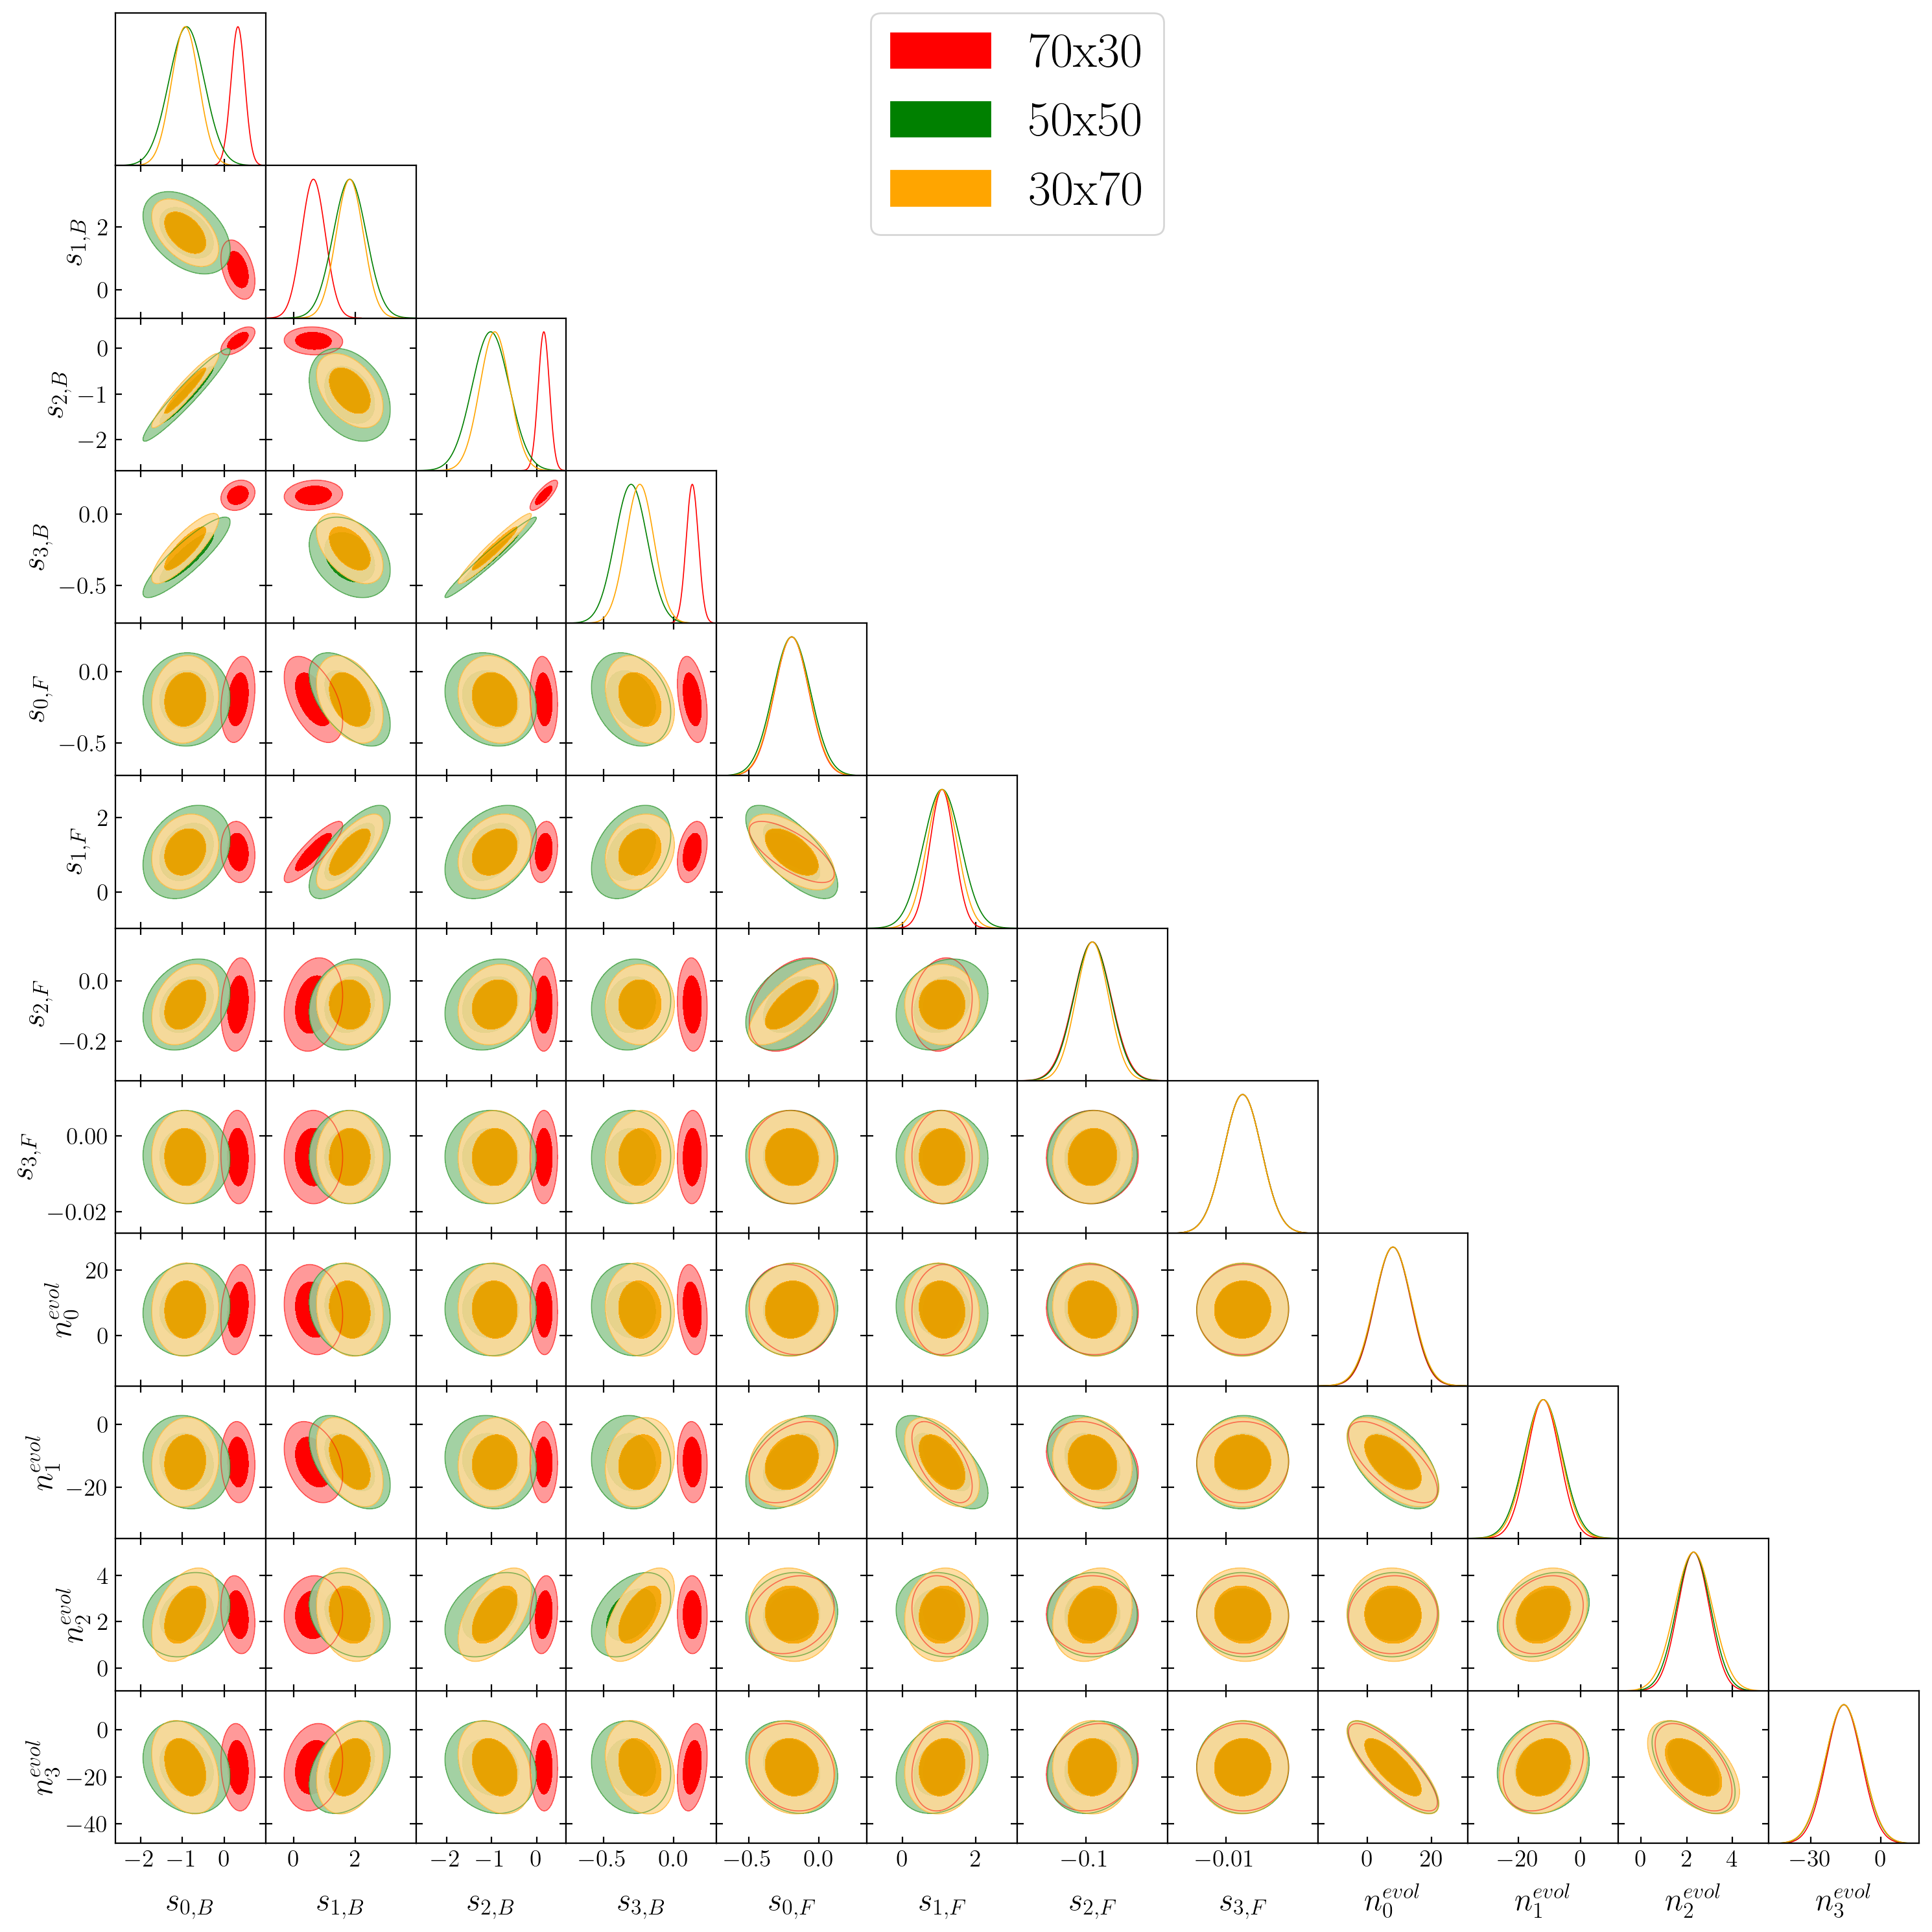

In [32]:
# Triangle plot MAGNIFICATION BIAS, NUMBER DENSITY EVOLUTION

mean_30 = np.concatenate([sB_30, sF, nevol])
mean_50 = np.concatenate([sB_50, sF, nevol])
mean_70 = np.concatenate([sB_70, sF, nevol])

sB_names = ['s'+str(int(i))+'B' for i in np.arange(len(sB_30))]
sF_names = ['s'+str(int(i))+'F' for i in np.arange(len(sB_30))]

sB_labels=[r's_{'+str(i)+r',B}' for i in np.arange(len(sB_30))]
sF_labels=[r's_{'+str(i)+r',F}' for i in np.arange(len(sB_30))]

num_names = ['n'+str(int(i)) for i in np.arange(len(nevol))]

num_labels=[r'n_{'+str(i)+r'}^{evol}' for i in np.arange(len(nevol))]

param_names = sB_names + sF_names + num_names 
labels = sB_labels + sF_labels + num_labels 

GaussDist_sbias_30x70 = GaussianND(mean_30, Sigma_Matrix_30x70[:len(mean_30), :len(mean_30)], labels = labels, names = param_names)
GaussDist_sbias_50x50 = GaussianND(mean_50, Sigma_Matrix_50x50[:len(mean_50), :len(mean_50)], labels = labels, names = param_names)
GaussDist_sbias_70x30 = GaussianND(mean_70, Sigma_Matrix_70x30[:len(mean_70), :len(mean_70)], labels = labels, names = param_names)


g = plots.get_subplot_plotter(width_inch=15)
g.settings.legend_frame = True
g.settings.alpha_filled_add=0.9
g.settings.legend_fontsize=32
g.settings.axes_fontsize=18
g.settings.axes_labelsize=22
g.settings.axis_tick_max_labels=6

g.triangle_plot([GaussDist_sbias_30x70, GaussDist_sbias_50x50, GaussDist_sbias_70x30], param_names, 
                filled=True, 
                legend_labels=['70x30', '50x50', '30x70'],
                contour_colors=['red', 'green', 'orange'])

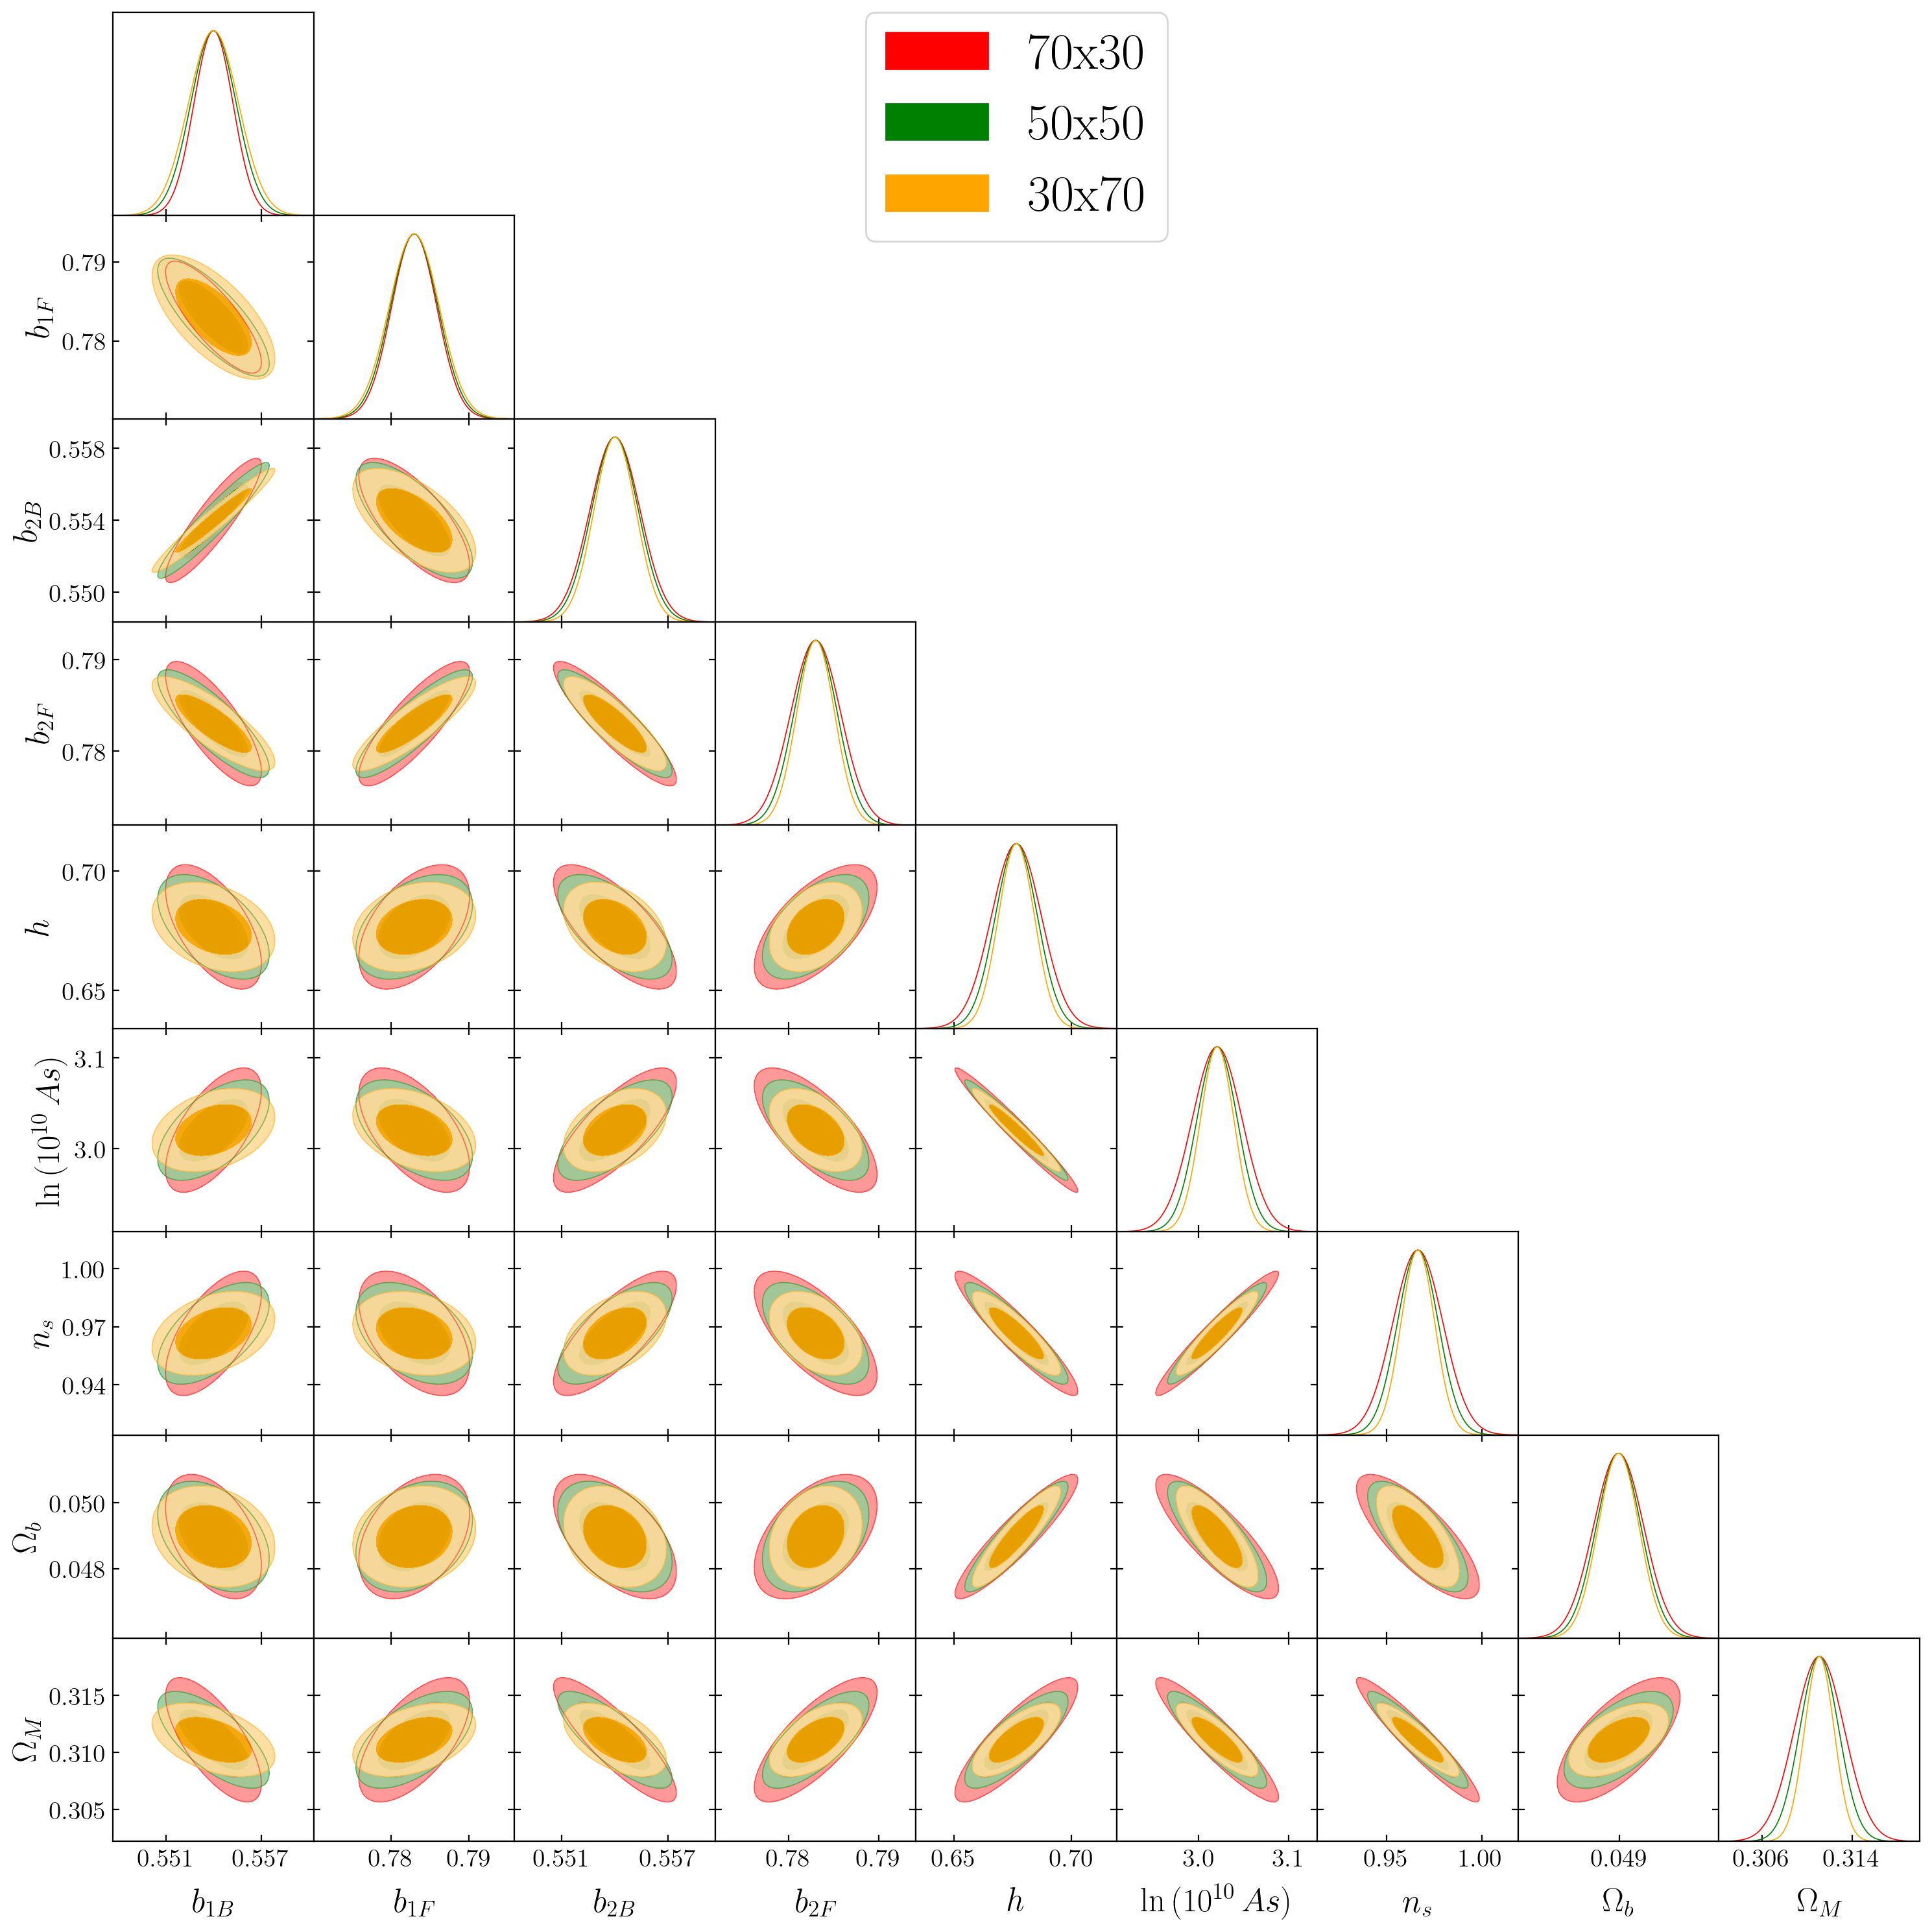

In [33]:
# Triangle plot MAGNIFICATION BIAS, NUMBER DENSITY EVOLUTION

mean = np.concatenate([gbias_fid, cosmic_fid])

gbias_names = ['b1B', 'b1F', 'b2B', 'b2F']
cosmic_names = ['h', 'As', 'ns', 'Ob', 'Om']

gbias_labels = [r'b_{1B}', r'b_{1F}', r'b_{2B}', r'b_{2F}']
cosmic_labels = [r'h', r'\ln{(10^{10}\,As)}', r'n_s', r'\Omega_b', r'\Omega_M']


param_names = gbias_names + cosmic_names 
labels = gbias_labels + cosmic_labels 

GaussDist_sbias_30x70 = GaussianND(mean, Sigma_Matrix_30x70[12:, 12:], labels = labels, names = param_names)
GaussDist_sbias_50x50 = GaussianND(mean, Sigma_Matrix_50x50[12:, 12:], labels = labels, names = param_names)
GaussDist_sbias_70x30 = GaussianND(mean, Sigma_Matrix_70x30[12:, 12:], labels = labels, names = param_names)


g = plots.get_subplot_plotter(width_inch=15)
g.settings.legend_frame = True
g.settings.alpha_filled_add=0.9
g.settings.legend_fontsize=32
g.settings.axes_fontsize=18
g.settings.axes_labelsize=22
g.settings.axis_tick_max_labels=6

g.triangle_plot([GaussDist_sbias_70x30, GaussDist_sbias_50x50, GaussDist_sbias_30x70], param_names, 
                filled=True, 
                legend_labels=['70x30', '50x50', '30x70'],
                contour_colors=['red', 'green', 'orange'])

# PREDICTIONS

## MAGNIFICATION BIAS

In [34]:
# FUNCTIONS

def magbias_fit(params, x):
    a, b, c, d = params
    return  a + b * x + c * np.log(x) + d * (np.log(x))**2

def nevol_fit(params, x):
    a, b, c, d = params
    return a + b * x + c * (1/x) + d * np.exp(-x)

In [35]:
z_lin = np.linspace(z_bins[0], z_bins[-1], 100)
m_split = [10/3, 2.0, 10/7]

sB_30_fid = magbias_fit(sB_30, z_lin)
sB_50_fid = magbias_fit(sB_50, z_lin)
sB_70_fid = magbias_fit(sB_70, z_lin)

sM_fid = magbias_fit(sF, z_lin)

def sF_fid(m_split, sB_fid):
    return sM_fid * (m_split/(m_split-1)) - sB_fid/(m_split-1)

sF_30_fid = sF_fid(m_split[0], sB_30_fid)
sF_50_fid = sF_fid(m_split[1], sB_50_fid)
sF_70_fid = sF_fid(m_split[2], sB_70_fid)

In [36]:
# Select the marginalized covariance matrix for the magnification biases

cov_sB_30x70 = Sigma_Matrix_30x70[:4, :4]
cov_sM_30x70 = Sigma_Matrix_30x70[4:8, 4:8]

cov_sB_50x50 = Sigma_Matrix_50x50[:4, :4]
cov_sM_50x50 = Sigma_Matrix_50x50[4:8, 4:8]

cov_sB_70x30 = Sigma_Matrix_70x30[:4, :4]
cov_sM_70x30 = Sigma_Matrix_70x30[4:8, 4:8]

# Generate parameter samples from multivariate normal distribution

np.random.seed(42)

num_samples = 1000
sB_30_pars_samples = np.random.multivariate_normal(sB_30, cov_sB_30x70, num_samples)
sB_50_pars_samples = np.random.multivariate_normal(sB_50, cov_sB_50x50, num_samples)
sB_70_pars_samples = np.random.multivariate_normal(sB_70, cov_sB_70x30, num_samples)

sM_30_pars_samples = np.random.multivariate_normal(sF, cov_sM_30x70, num_samples)
sM_50_pars_samples = np.random.multivariate_normal(sF, cov_sM_50x50, num_samples)
sM_70_pars_samples = np.random.multivariate_normal(sF, cov_sM_70x30, num_samples)

# Evaluate fitting function for each parameter sample

sB_30_samples = np.array([magbias_fit(pars, z_lin) for pars in sB_30_pars_samples])
sB_50_samples = np.array([magbias_fit(pars, z_lin) for pars in sB_50_pars_samples])
sB_70_samples = np.array([magbias_fit(pars, z_lin) for pars in sB_70_pars_samples])

sM_30_samples = np.array([magbias_fit(pars, z_lin) for pars in sM_30_pars_samples])
sM_50_samples = np.array([magbias_fit(pars, z_lin) for pars in sM_50_pars_samples])
sM_70_samples = np.array([magbias_fit(pars, z_lin) for pars in sM_70_pars_samples])

# Calculate the 68% confidence interval

sB_30_lower_bound = np.percentile(sB_30_samples, 16, axis=0)
sB_30_upper_bound = np.percentile(sB_30_samples, 84, axis=0)

sB_50_lower_bound = np.percentile(sB_50_samples, 16, axis=0)
sB_50_upper_bound = np.percentile(sB_50_samples, 84, axis=0)

sB_70_lower_bound = np.percentile(sB_70_samples, 16, axis=0)
sB_70_upper_bound = np.percentile(sB_70_samples, 84, axis=0)

sM_30_lower_bound = np.percentile(sM_30_samples, 16, axis=0)
sM_30_upper_bound = np.percentile(sM_30_samples, 84, axis=0)

sM_50_lower_bound = np.percentile(sM_50_samples, 16, axis=0)
sM_50_upper_bound = np.percentile(sM_50_samples, 84, axis=0)

sM_70_lower_bound = np.percentile(sM_70_samples, 16, axis=0)
sM_70_upper_bound = np.percentile(sM_70_samples, 84, axis=0)

In [37]:
# Select the marginalized covariance matrix for the magnification biases priors

cov_sB_30_priors = Cov_all_30[:4, :4]
cov_sB_50_priors = Cov_all_50[:4, :4]
cov_sB_70_priors = Cov_all_70[:4, :4]

cov_sM_30_priors = Cov_all_30[4:8, 4:8]
cov_sM_50_priors = Cov_all_50[4:8, 4:8]
cov_sM_70_priors = Cov_all_70[4:8, 4:8]

# Generate parameter samples from multivariate normal distribution
num_samples = 1000
sB_30_pars_samples_priors = np.random.multivariate_normal(sB_30, cov_sB_30_priors, num_samples)
sB_50_pars_samples_priors = np.random.multivariate_normal(sB_50, cov_sB_50_priors, num_samples)
sB_70_pars_samples_priors = np.random.multivariate_normal(sB_70, cov_sB_70_priors, num_samples)

sM_30_pars_samples_priors = np.random.multivariate_normal(sF, cov_sM_30_priors, num_samples)
sM_50_pars_samples_priors = np.random.multivariate_normal(sF, cov_sM_50_priors, num_samples)
sM_70_pars_samples_priors = np.random.multivariate_normal(sF, cov_sM_70_priors, num_samples)

# Evaluate fitting function for each parameter sample
sB_30_samples_priors = np.array([magbias_fit(pars, z_lin) for pars in sB_30_pars_samples_priors])
sB_50_samples_priors = np.array([magbias_fit(pars, z_lin) for pars in sB_50_pars_samples_priors])
sB_70_samples_priors = np.array([magbias_fit(pars, z_lin) for pars in sB_70_pars_samples_priors])

sM_30_samples_priors = np.array([magbias_fit(pars, z_lin) for pars in sM_30_pars_samples_priors])
sM_50_samples_priors = np.array([magbias_fit(pars, z_lin) for pars in sM_50_pars_samples_priors])
sM_70_samples_priors = np.array([magbias_fit(pars, z_lin) for pars in sM_70_pars_samples_priors])


# Calculate the 68% confidence interval
sB_30_lower_bound_priors = np.percentile(sB_30_samples_priors, 16, axis=0)
sB_30_upper_bound_priors = np.percentile(sB_30_samples_priors, 84, axis=0)

sB_50_lower_bound_priors = np.percentile(sB_50_samples_priors, 16, axis=0)
sB_50_upper_bound_priors = np.percentile(sB_50_samples_priors, 84, axis=0)

sB_70_lower_bound_priors = np.percentile(sB_70_samples_priors, 16, axis=0)
sB_70_upper_bound_priors = np.percentile(sB_70_samples_priors, 84, axis=0)

sM_30_lower_bound_priors = np.percentile(sM_30_samples_priors, 16, axis=0)
sM_30_upper_bound_priors = np.percentile(sM_30_samples_priors, 84, axis=0)

sM_50_lower_bound_priors = np.percentile(sM_50_samples_priors, 16, axis=0)
sM_50_upper_bound_priors = np.percentile(sM_50_samples_priors, 84, axis=0)

sM_70_lower_bound_priors = np.percentile(sM_70_samples_priors, 16, axis=0)
sM_70_upper_bound_priors = np.percentile(sM_70_samples_priors, 84, axis=0)

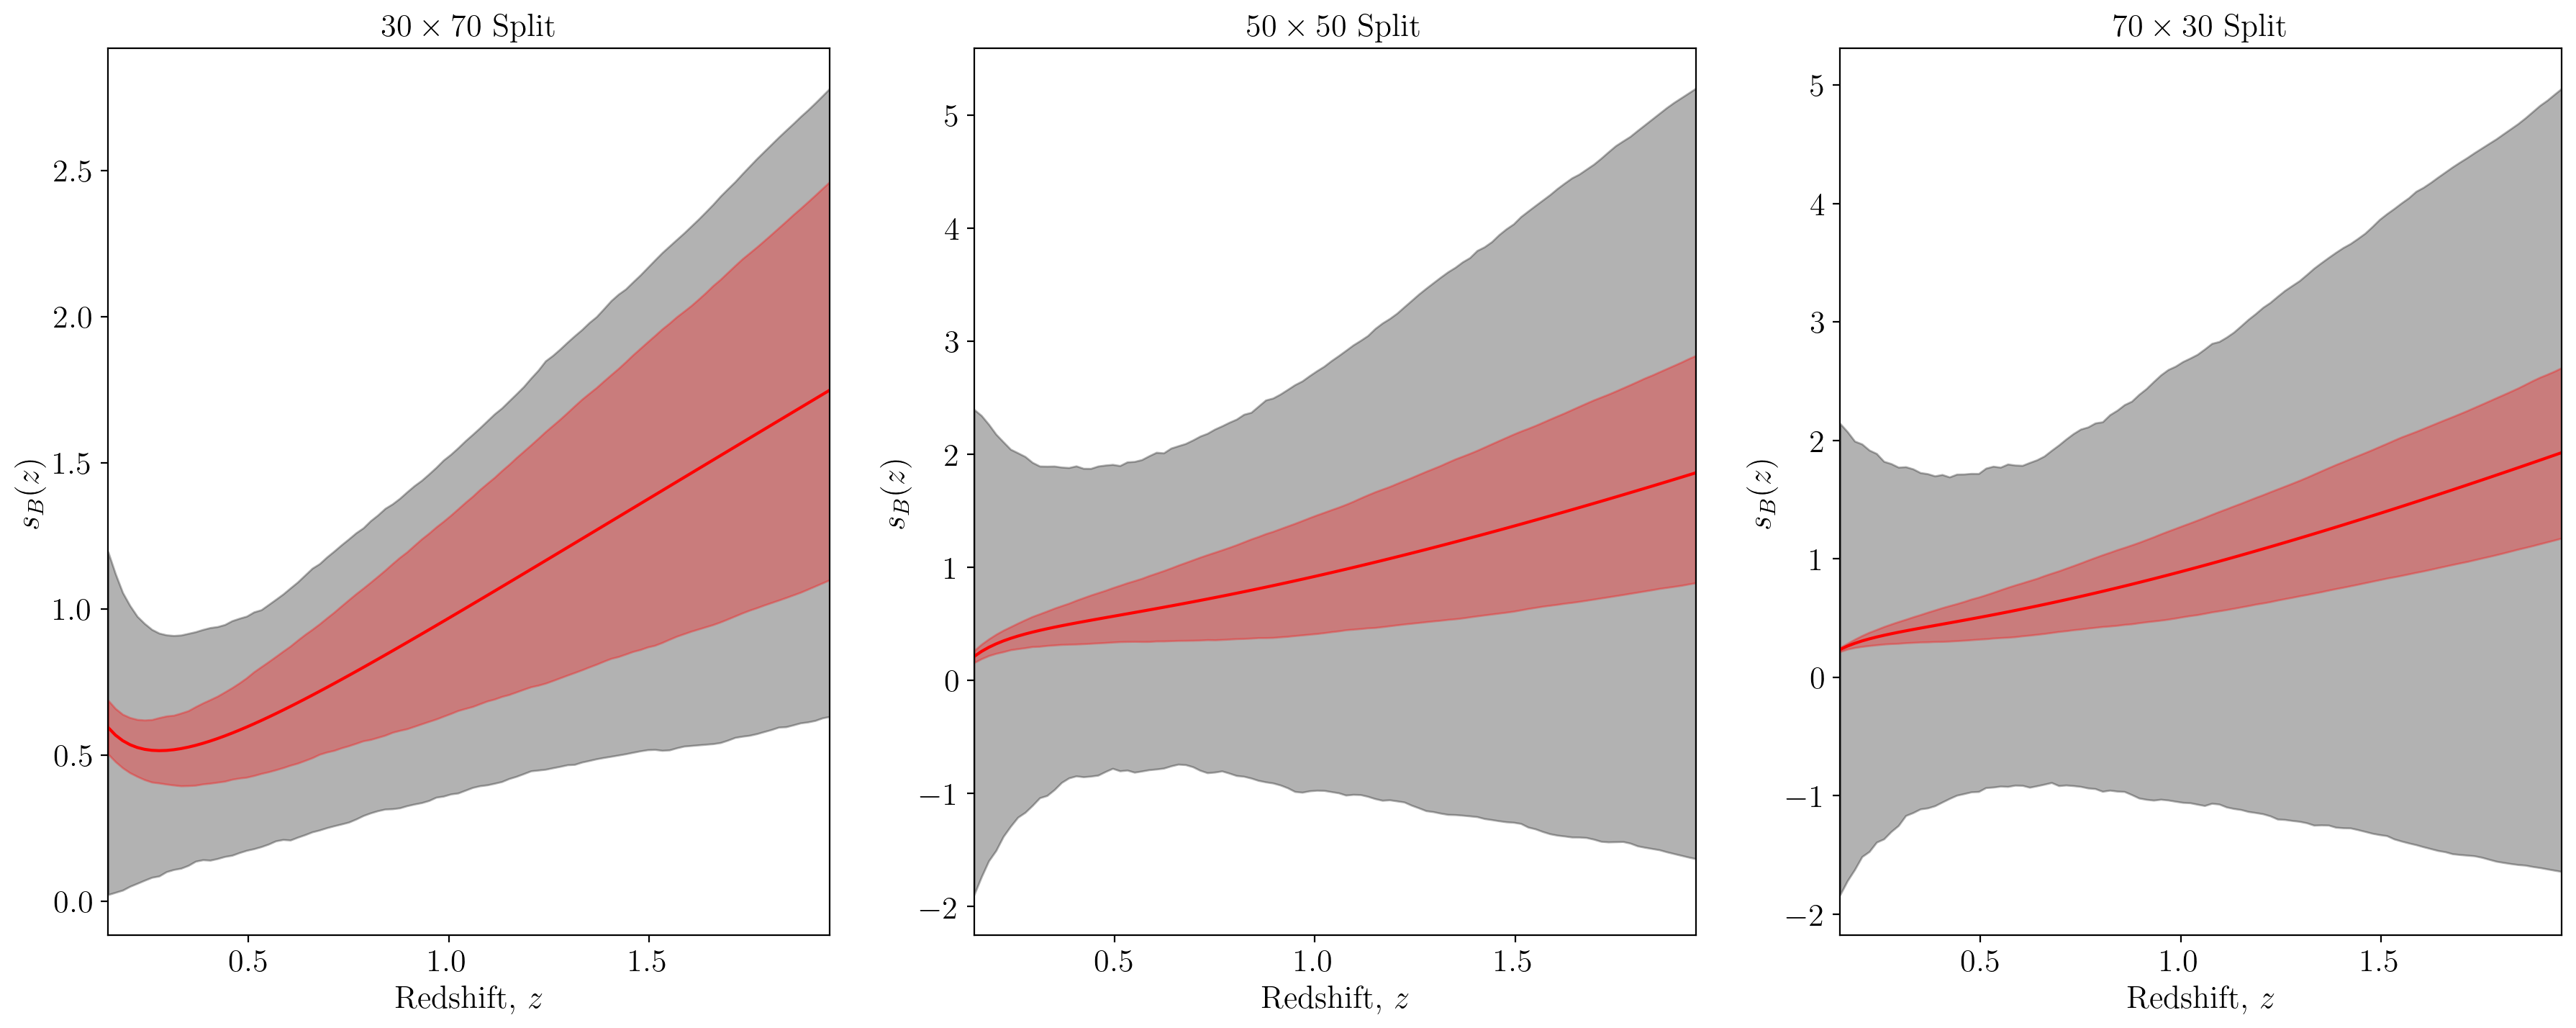

In [39]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize = (22,8))

ax[0].plot(z_lin, sB_30_fid, 'r-', lw = 1.5)
ax[0].fill_between(z_lin, sB_30_lower_bound_priors, sB_30_upper_bound_priors, color='black', alpha=0.3)
ax[0].fill_between(z_lin, sB_30_lower_bound, sB_30_upper_bound, color='red', alpha=0.3)
ax[0].set_title(r'$30\times 70$ Split')

ax[1].plot(z_lin, sB_50_fid, 'r-', lw = 1.5)
ax[1].fill_between(z_lin, sB_50_lower_bound_priors, sB_50_upper_bound_priors, color='black', alpha=0.3)
ax[1].fill_between(z_lin, sB_50_lower_bound, sB_50_upper_bound, color='red', alpha=0.3)
ax[1].set_title(r'$50\times 50$ Split')


ax[2].plot(z_lin, sB_70_fid, 'r-', lw = 1.5)
ax[2].fill_between(z_lin, sB_70_lower_bound_priors, sB_70_upper_bound_priors, color='black', alpha=0.3)
ax[2].fill_between(z_lin, sB_70_lower_bound, sB_70_upper_bound, color='red', alpha=0.3)
ax[2].set_title(r'$70\times 30$ Split')


for axi in ax:
    axi.set_xlim(0.15, 1.95)
    #axi.set_ylim(-0.5, 3.0)
    axi.set_xlabel(r'Redshift, $z$')
    axi.set_ylabel(r'$s_B(z)$')

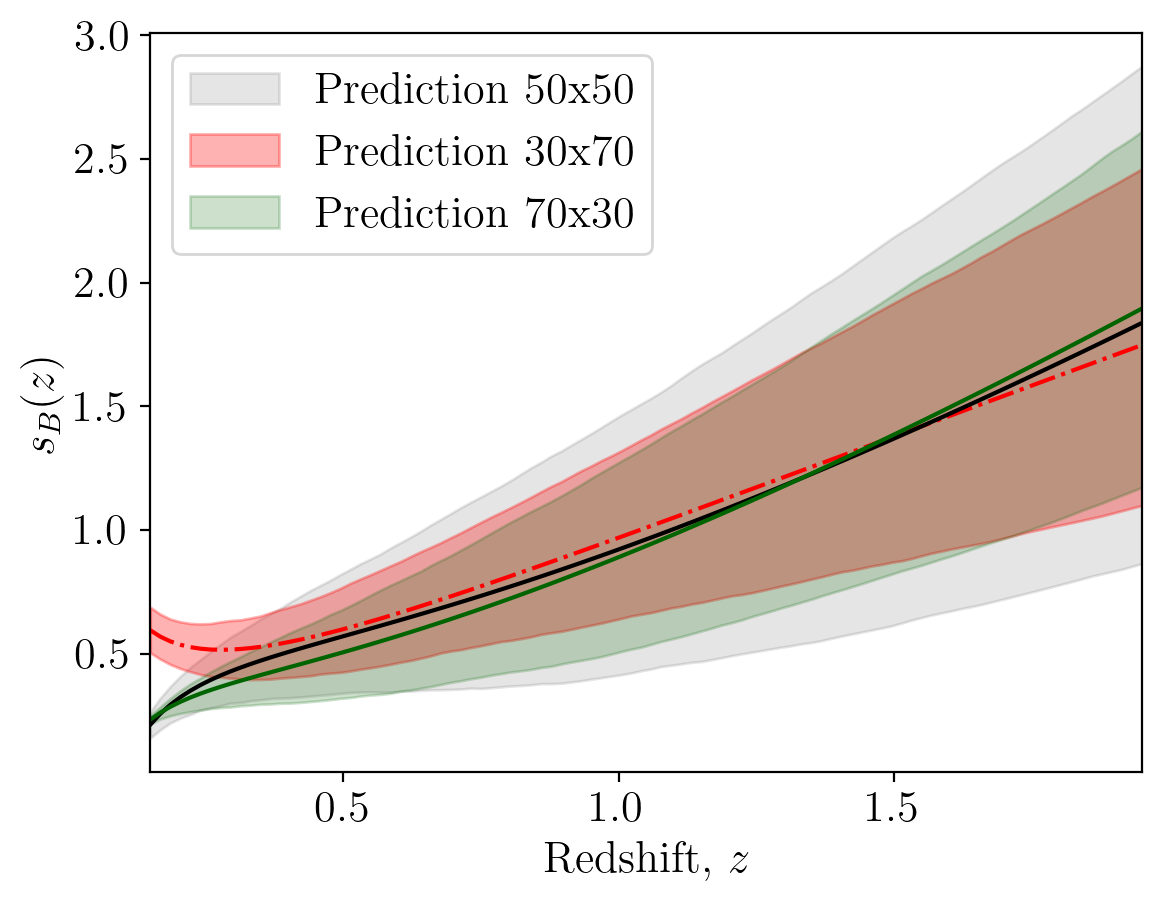

In [40]:
plt.plot(z_lin, sB_30_fid, '-.', lw = 1.5, color='red')
plt.plot(z_lin, sB_50_fid, '-', lw = 1.5, color='black')
plt.plot(z_lin, sB_70_fid, '-', lw = 1.5, color='darkgreen')

plt.fill_between(z_lin, sB_50_lower_bound, sB_50_upper_bound, color='black', alpha=0.1, label='Prediction 50x50')
plt.fill_between(z_lin, sB_30_lower_bound, sB_30_upper_bound, color='red', alpha=0.3, label='Prediction 30x70')
plt.fill_between(z_lin, sB_70_lower_bound, sB_70_upper_bound, color='darkgreen', alpha=0.2, label='Prediction 70x30')

plt.xlim(z_bins[0],z_bins[-1])
plt.xlabel(r'Redshift, $z$');
plt.ylabel(r'$s_B(z)$');
plt.legend(loc='upper left');

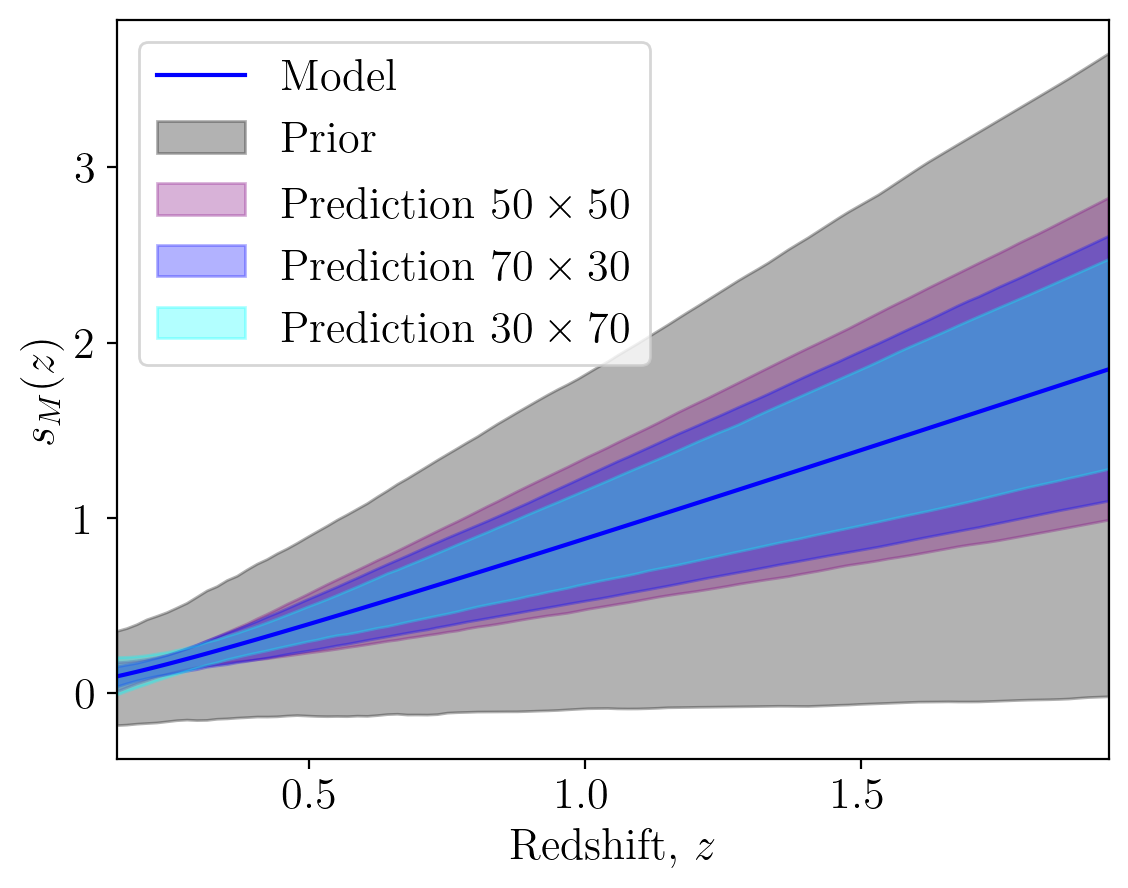

In [41]:
plt.plot(z_lin, sM_fid, '-', lw = 1.5, color='blue', label = 'Model')

# Shade the 68% confidence interval

plt.fill_between(z_lin, sM_70_lower_bound_priors, sM_70_upper_bound_priors, color='black', alpha=0.3, label = r'Prior')

plt.fill_between(z_lin, sM_50_lower_bound, sM_50_upper_bound, color='purple', alpha=0.3, label = r'Prediction $50\times 50$')
plt.fill_between(z_lin, sM_70_lower_bound, sM_70_upper_bound, color='blue', alpha=0.3, label = r'Prediction $70\times 30$')
plt.fill_between(z_lin, sM_30_lower_bound, sM_30_upper_bound, color='cyan', alpha=0.3, label = r'Prediction $30\times 70$')

plt.xlim(z_bins[0],z_bins[-1])

plt.xlabel(r'Redshift, $z$');
plt.ylabel(r'$s_M(z)$');
plt.legend(loc='upper left');

The magnification bias of the faint population is obtained by:

$$ s_F(z) = s_{model}(z)\frac{\bar{N}(z)}{\bar{N}_F(z)} - s_B(z)\frac{\bar{N}_B(z)}{\bar{N}_F(z)} = s_F(z) = s_{model}(z)\frac{m}{m-1} - s_B(z)\frac{1}{m-1} $$ 

We need to sample together the $s_B$ and $s_m$ parameters.

In [42]:
sbias_30 = np.concatenate([sB_30, sF])
sbias_50 = np.concatenate([sB_50, sF])
sbias_70 = np.concatenate([sB_70, sF])

In [43]:
# Select the marginalized covariance matrix for the magnification biases together
cov_sbias_30 = Sigma_Matrix_30x70[:8, :8]
cov_sbias_50 = Sigma_Matrix_50x50[:8, :8]
cov_sbias_70 = Sigma_Matrix_70x30[:8, :8]

# Generate parameter samples from multivariate normal distribution
num_samples = 1000
sbias_30_pars_samples = np.random.multivariate_normal(sbias_30, cov_sbias_30, num_samples)
sbias_50_pars_samples = np.random.multivariate_normal(sbias_50, cov_sbias_50, num_samples)
sbias_70_pars_samples = np.random.multivariate_normal(sbias_70, cov_sbias_70, num_samples)

# Evaluate fitting function for each parameter sample
sB_30_samples_ = np.array([magbias_fit(pars[:4], z_lin) for pars in sbias_30_pars_samples])
sB_50_samples_ = np.array([magbias_fit(pars[:4], z_lin) for pars in sbias_50_pars_samples])
sB_70_samples_ = np.array([magbias_fit(pars[:4], z_lin) for pars in sbias_70_pars_samples])

sM_30_samples_ = np.array([magbias_fit(pars[4:], z_lin) for pars in sbias_30_pars_samples])
sM_50_samples_ = np.array([magbias_fit(pars[4:], z_lin) for pars in sbias_50_pars_samples])
sM_70_samples_ = np.array([magbias_fit(pars[4:], z_lin) for pars in sbias_70_pars_samples])

# Compute the sF for each sample
sF_30_samples_ = sM_30_samples_*m_split[0]/(m_split[0]-1) - sB_30_samples_/(m_split[0]-1)
sF_50_samples_ = sM_50_samples_*m_split[1]/(m_split[1]-1) - sB_50_samples_/(m_split[1]-1)
sF_70_samples_ = sM_70_samples_*m_split[2]/(m_split[2]-1) - sB_70_samples_/(m_split[2]-1)

# Calculate the 68% confidence interval
sF_30_lower_bound = np.percentile(sF_30_samples_, 16, axis=0)
sF_30_upper_bound = np.percentile(sF_30_samples_, 84, axis=0)

sF_50_lower_bound = np.percentile(sF_50_samples_, 16, axis=0)
sF_50_upper_bound = np.percentile(sF_50_samples_, 84, axis=0)

sF_70_lower_bound = np.percentile(sF_70_samples_, 16, axis=0)
sF_70_upper_bound = np.percentile(sF_70_samples_, 84, axis=0)

In [44]:
# Select the marginalized covariance matrix for the magnification biases together
cov_sbias_30_priors = Cov_all_30[:8, :8]
cov_sbias_50_priors = Cov_all_50[:8, :8]
cov_sbias_70_priors = Cov_all_70[:8, :8]


# Generate parameter samples from multivariate normal distribution
num_samples = 1000
sbias_30_pars_samples_priors = np.random.multivariate_normal(sbias_30, cov_sbias_30_priors, num_samples)
sbias_50_pars_samples_priors = np.random.multivariate_normal(sbias_50, cov_sbias_50_priors, num_samples)
sbias_70_pars_samples_priors = np.random.multivariate_normal(sbias_70, cov_sbias_70_priors, num_samples)

# Evaluate fitting function for each parameter sample
sB_30_samples_priors = np.array([magbias_fit(pars[:4], z_lin) for pars in sbias_30_pars_samples_priors])
sB_50_samples_priors = np.array([magbias_fit(pars[:4], z_lin) for pars in sbias_50_pars_samples_priors])
sB_70_samples_priors = np.array([magbias_fit(pars[:4], z_lin) for pars in sbias_70_pars_samples_priors])

sM_30_samples_priors = np.array([magbias_fit(pars[4:8], z_lin) for pars in sbias_30_pars_samples_priors])
sM_50_samples_priors = np.array([magbias_fit(pars[4:8], z_lin) for pars in sbias_50_pars_samples_priors])
sM_70_samples_priors = np.array([magbias_fit(pars[4:8], z_lin) for pars in sbias_70_pars_samples_priors])


# Compute the sF for each sample
sF_30_samples_priors = sM_30_samples_priors*m_split[0]/(m_split[0]-1) - sB_30_samples_priors/(m_split[0]-1)
sF_50_samples_priors = sM_50_samples_priors*m_split[1]/(m_split[1]-1) - sB_50_samples_priors/(m_split[1]-1)
sF_70_samples_priors = sM_70_samples_priors*m_split[2]/(m_split[2]-1) - sB_70_samples_priors/(m_split[2]-1)

# Calculate the 68% confidence interval
sF_30_lower_bound_priors = np.percentile(sF_30_samples_priors, 16, axis=0)
sF_30_upper_bound_priors = np.percentile(sF_30_samples_priors, 84, axis=0)

sF_50_lower_bound_priors = np.percentile(sF_50_samples_priors, 16, axis=0)
sF_50_upper_bound_priors = np.percentile(sF_50_samples_priors, 84, axis=0)

sF_70_lower_bound_priors = np.percentile(sF_70_samples_priors, 16, axis=0)
sF_70_upper_bound_priors = np.percentile(sF_70_samples_priors, 84, axis=0)

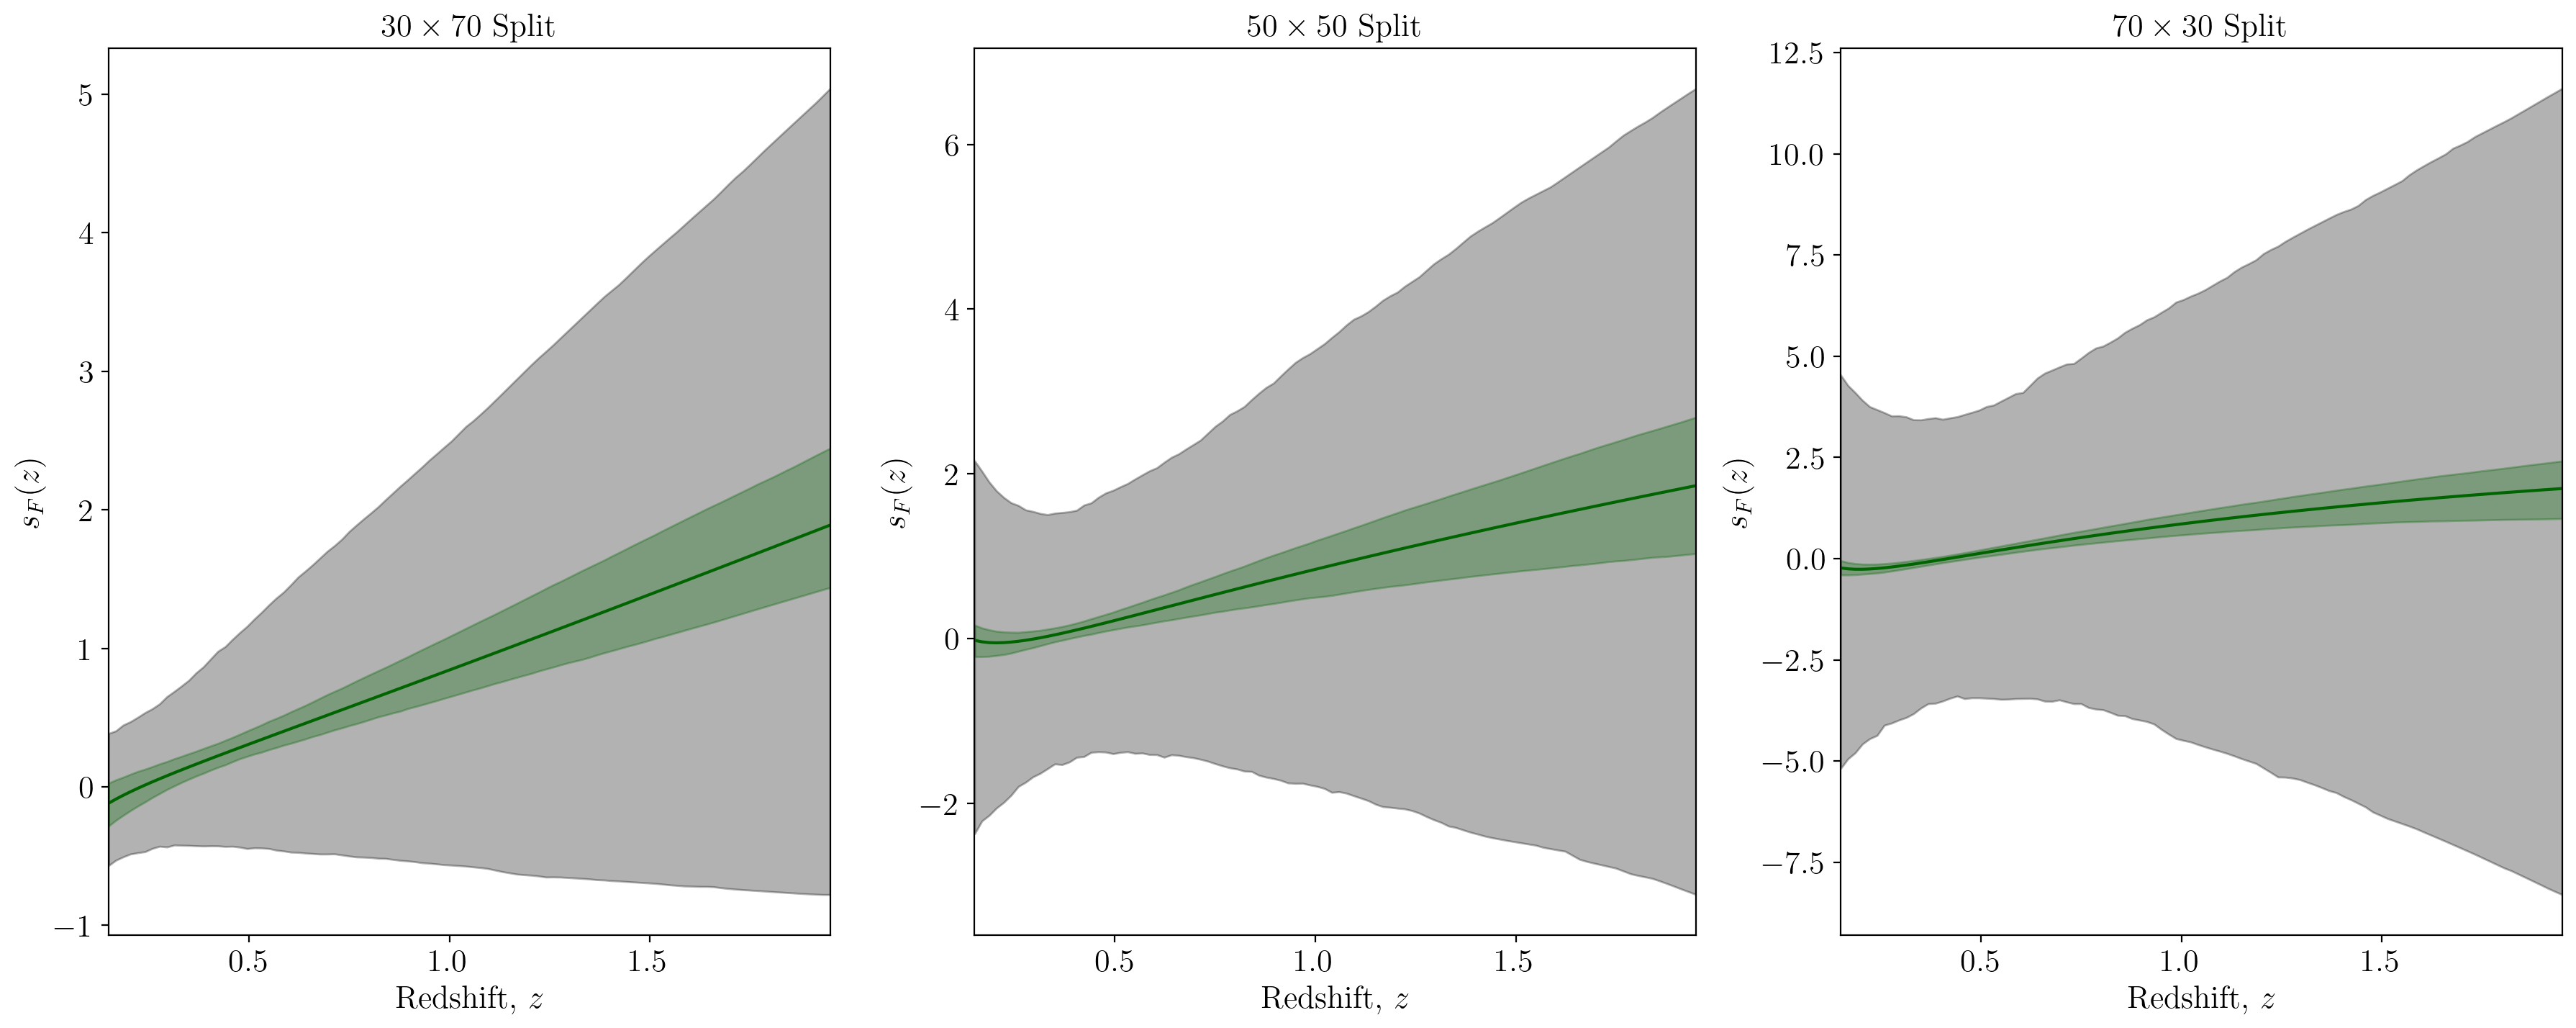

In [46]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize = (22,8))

ax[0].plot(z_lin, sF_30_fid, '-', lw = 1.5, color='darkgreen')
ax[0].fill_between(z_lin, sF_30_lower_bound_priors, sF_30_upper_bound_priors, color='black', alpha=0.3)
ax[0].fill_between(z_lin, sF_30_lower_bound, sF_30_upper_bound, color='darkgreen', alpha=0.3)
ax[0].set_title(r'$30\times 70$ Split')

ax[1].plot(z_lin, sF_50_fid, '-', lw = 1.5, color='darkgreen')
ax[1].fill_between(z_lin, sF_50_lower_bound_priors, sF_50_upper_bound_priors, color='black', alpha=0.3)
ax[1].fill_between(z_lin, sF_50_lower_bound, sF_50_upper_bound, color='darkgreen', alpha=0.3)
ax[1].set_title(r'$50\times 50$ Split')


ax[2].plot(z_lin, sF_70_fid, '-', lw = 1.5, color='darkgreen')
ax[2].fill_between(z_lin, sF_70_lower_bound_priors, sF_70_upper_bound_priors, color='black', alpha=0.3)
ax[2].fill_between(z_lin, sF_70_lower_bound, sF_70_upper_bound, color='darkgreen', alpha=0.3)
ax[2].set_title(r'$70\times 30$ Split')


for axi in ax:
    axi.set_xlim(0.15, 1.95)
    #axi.set_ylim(-1.0, 3.0)
    axi.set_xlabel(r'Redshift, $z$')
    axi.set_ylabel(r'$s_F(z)$')

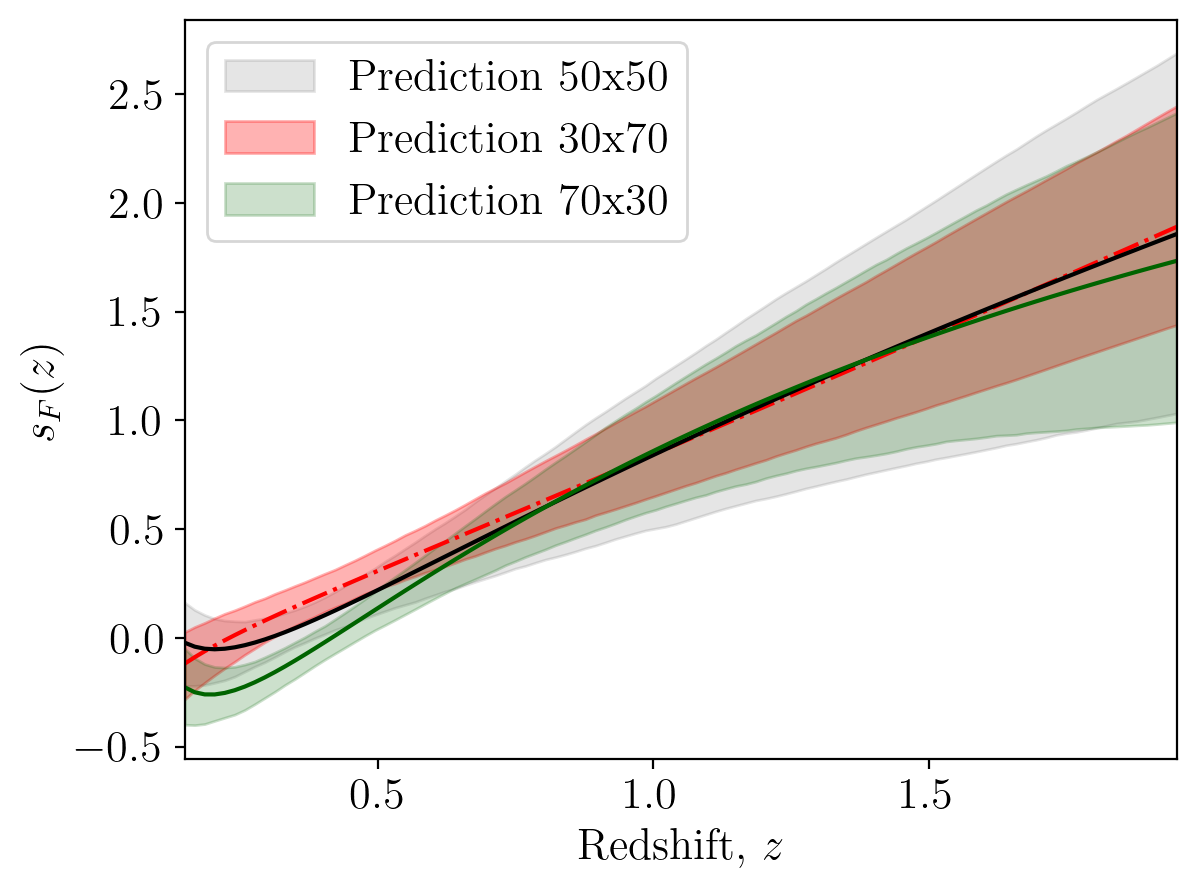

In [47]:
plt.plot(z_lin, sF_30_fid, '-.', lw = 1.5, color='red')
plt.plot(z_lin, sF_50_fid, '-', lw = 1.5, color='black')
plt.plot(z_lin, sF_70_fid, '-', lw = 1.5, color='darkgreen')

plt.fill_between(z_lin, sF_50_lower_bound, sF_50_upper_bound, color='black', alpha=0.1, label='Prediction 50x50')
plt.fill_between(z_lin, sF_30_lower_bound, sF_30_upper_bound, color='red', alpha=0.3, label='Prediction 30x70')
plt.fill_between(z_lin, sF_70_lower_bound, sF_70_upper_bound, color='darkgreen', alpha=0.2, label='Prediction 70x30')

plt.xlim(z_bins[0],z_bins[-1])
plt.xlabel(r'Redshift, $z$');
plt.ylabel(r'$s_F(z)$');
plt.legend(loc='upper left');

In [48]:
width_sB_50 = (sB_50_upper_bound - sB_50_lower_bound)
width_sB_30 = (sB_30_upper_bound - sB_30_lower_bound)
width_sB_70 = (sB_70_upper_bound - sB_70_lower_bound)

In [49]:
sB_30_upper_bound[0], sB_30_lower_bound[0]

(0.6882272419314539, 0.5043315169683852)

In [50]:
np.mean(width_sB_50), np.median(width_sB_50), np.max(width_sB_30), np.max(width_sB_50), np.max(width_sB_70)

(1.080058277782049,
 1.0872150714624014,
 1.360872356945501,
 2.010762192366041,
 1.4396238315271612)

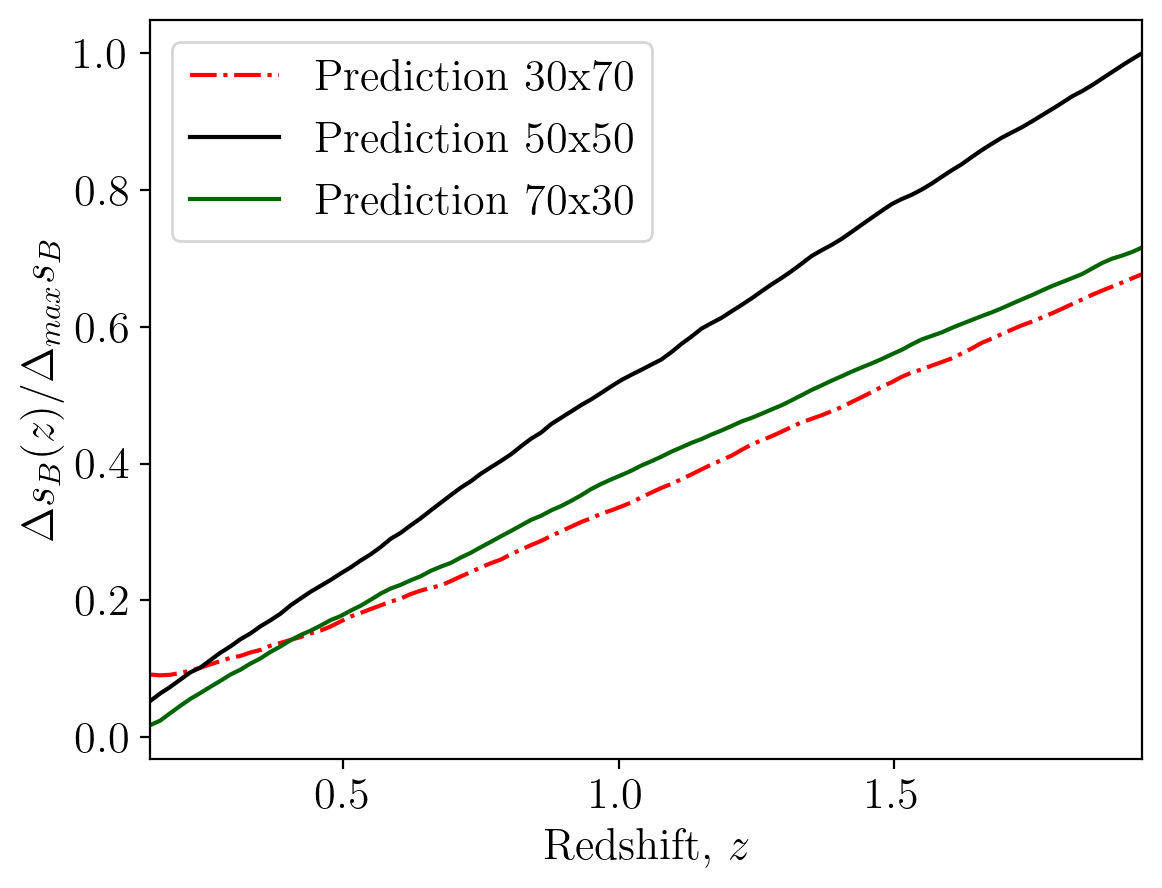

In [51]:
plt.plot(z_lin, width_sB_30/np.max(width_sB_50), '-.', lw = 1.5, color='red', label = 'Prediction 30x70')
plt.plot(z_lin, width_sB_50/np.max(width_sB_50), '-', lw = 1.5, color='black', label = 'Prediction 50x50')
plt.plot(z_lin, width_sB_70/np.max(width_sB_50), '-', lw = 1.5, color='darkgreen', label='Prediction 70x30')

plt.xlim(z_bins[0],z_bins[-1])
#plt.yscale('log')
#plt.xscale('log')
plt.xlabel(r'Redshift, $z$');
plt.ylabel(r'$\Delta s_B(z)/\Delta_{max} s_B$');
plt.legend(loc='upper left');

In [52]:
width_sM_50 = (sM_50_upper_bound - sM_50_lower_bound)
width_sM_30 = (sM_30_upper_bound - sM_30_lower_bound)
width_sM_70 = (sM_70_upper_bound - sM_70_lower_bound)

In [53]:
np.mean(width_sM_50), np.median(width_sM_50), np.max(width_sB_30), np.max(width_sM_50), np.max(width_sM_70)

(0.9180232988035822,
 0.9132021634369357,
 1.360872356945501,
 1.8377826208270556,
 1.5117208021414732)

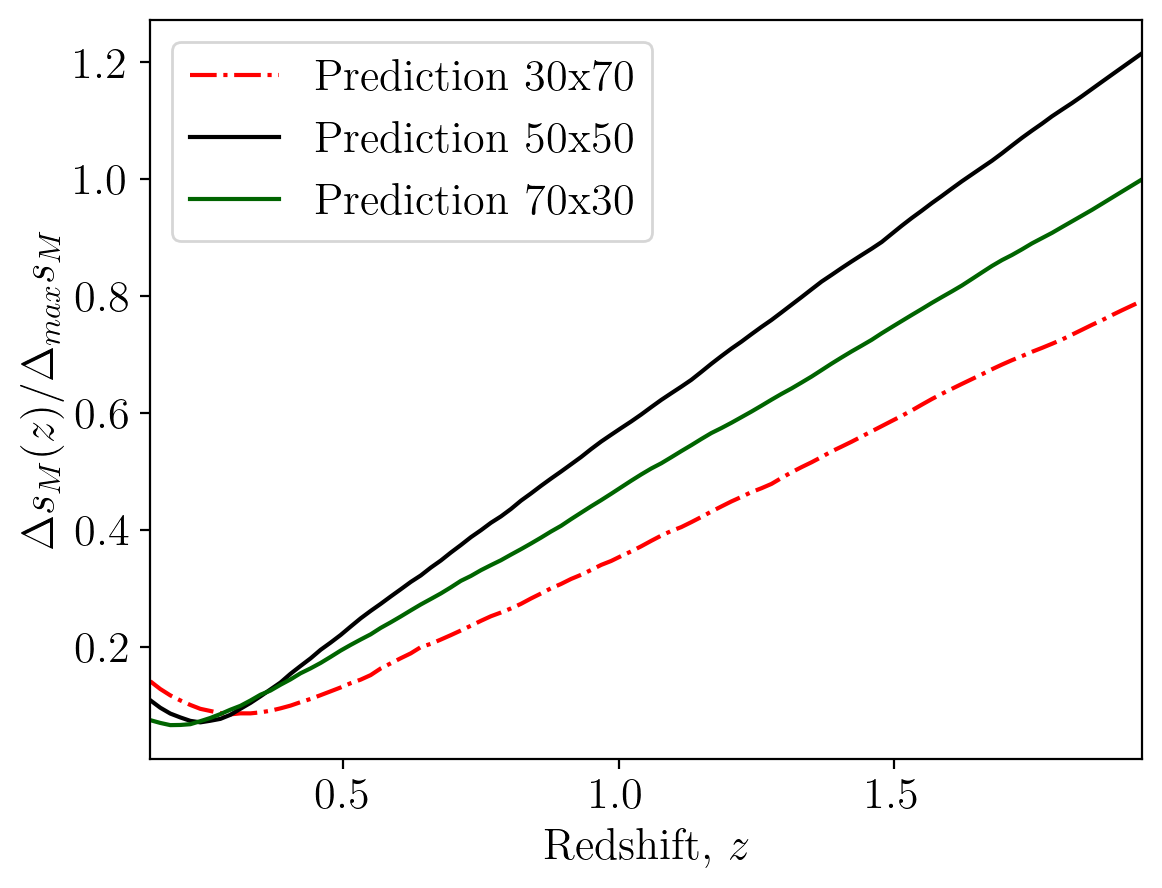

In [54]:
plt.plot(z_lin, width_sM_30/np.max(width_sM_70), '-.', lw = 1.5, color='red', label = 'Prediction 30x70')
plt.plot(z_lin, width_sM_50/np.max(width_sM_70), '-', lw = 1.5, color='black', label = 'Prediction 50x50')
plt.plot(z_lin, width_sM_70/np.max(width_sM_70), '-', lw = 1.5, color='darkgreen', label='Prediction 70x30')

plt.xlim(z_bins[0],z_bins[-1])
#plt.yscale('log')
#plt.xscale('log')
plt.xlabel(r'Redshift, $z$');
plt.ylabel(r'$\Delta s_M(z)/\Delta_{max} s_M$');
plt.legend(loc='upper left');

In [55]:
width_sF_50 = (sF_50_upper_bound - sF_50_lower_bound)
width_sF_30 = (sF_30_upper_bound - sF_30_lower_bound)
width_sF_70 = (sF_70_upper_bound - sF_70_lower_bound)

In [56]:
np.mean(width_sF_50), np.median(width_sF_50), np.max(width_sF_30), np.max(width_sF_50), np.max(width_sF_70)

(0.7818944778125351,
 0.7367841377169522,
 1.006315922398427,
 1.6569025116707736,
 1.4223680458310766)

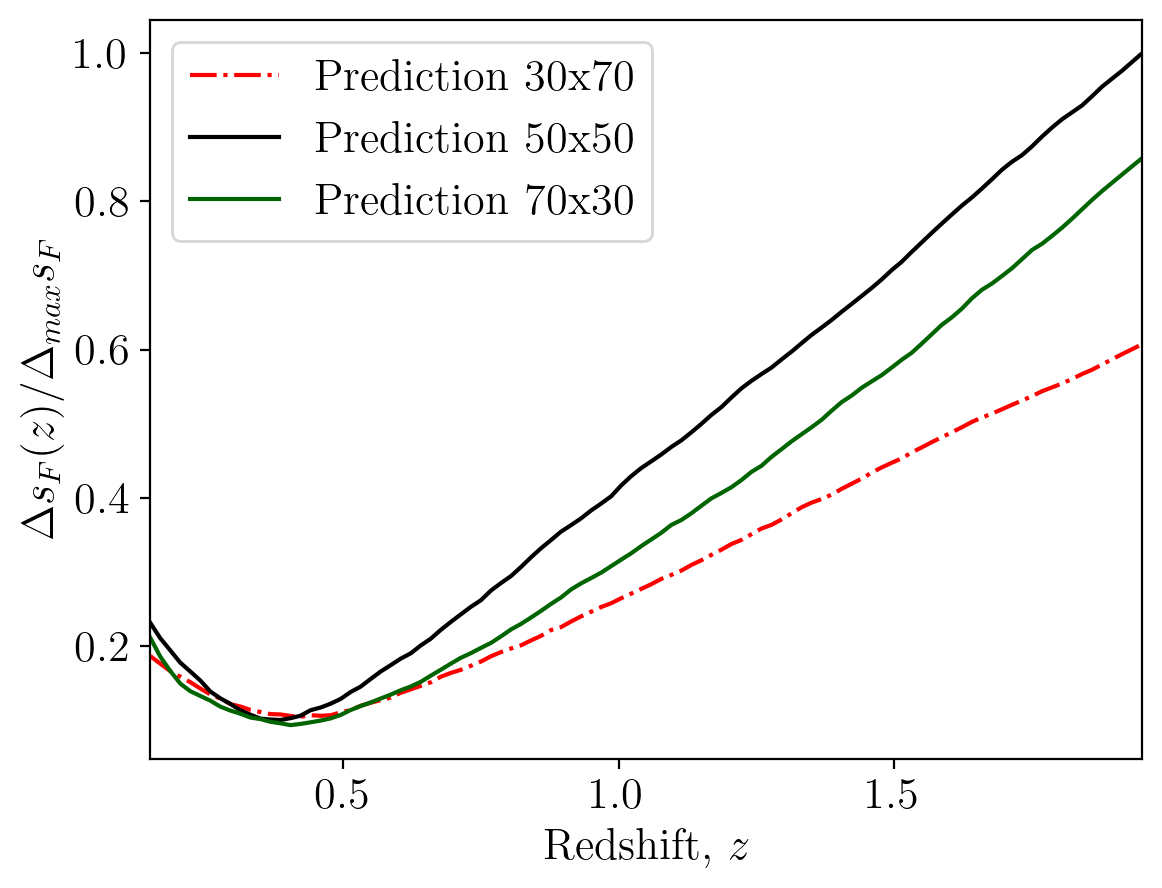

In [57]:
plt.plot(z_lin, width_sF_30/np.max(width_sF_50), '-.', lw = 1.5, color='red', label = 'Prediction 30x70')
plt.plot(z_lin, width_sF_50/np.max(width_sF_50), '-', lw = 1.5, color='black', label = 'Prediction 50x50')
plt.plot(z_lin, width_sF_70/np.max(width_sF_50), '-', lw = 1.5, color='darkgreen', label='Prediction 70x30')

plt.xlim(z_bins[0],z_bins[-1])
#plt.yscale('log')
#plt.xscale('log')
plt.xlabel(r'Redshift, $z$');
plt.ylabel(r'$\Delta s_F(z)/\Delta_{max} s_F$');
plt.legend(loc='upper left');

## NUMBER DENSITY EVOLUTION

In [58]:
num_evol_fid = nevol_fit(nevol, z_lin)

In [59]:
# Select the marginalized covariance matrix for the number evolution
cov_nevol_30 = Sigma_Matrix_30x70[8:12, 8:12]
cov_nevol_50 = Sigma_Matrix_50x50[8:12, 8:12]
cov_nevol_70 = Sigma_Matrix_70x30[8:12, 8:12]

cov_nevol_priors = Cov_all_30[8:12, 8:12]

# Generate parameter samples from multivariate normal distribution
num_samples = 1000
nevol_30_samples = np.random.multivariate_normal(nevol, cov_nevol_30, num_samples)
nevol_50_samples = np.random.multivariate_normal(nevol, cov_nevol_50, num_samples)
nevol_70_samples = np.random.multivariate_normal(nevol, cov_nevol_70, num_samples)

nevol_samples_priors = np.random.multivariate_normal(nevol, cov_nevol_priors, num_samples)

# Evaluate fitting function for each parameter sample
nevol_30_samples = np.array([nevol_fit(pars, z_lin) for pars in nevol_30_samples])
nevol_50_samples = np.array([nevol_fit(pars, z_lin) for pars in nevol_50_samples])
nevol_70_samples = np.array([nevol_fit(pars, z_lin) for pars in nevol_70_samples])

nevol_samples_priors = np.array([nevol_fit(pars, z_lin) for pars in nevol_samples_priors])

# Calculate the 68% confidence interval
nevol_30_lower_bound = np.percentile(nevol_30_samples, 16, axis=0)
nevol_30_upper_bound = np.percentile(nevol_30_samples, 84, axis=0)

nevol_50_lower_bound = np.percentile(nevol_50_samples, 16, axis=0)
nevol_50_upper_bound = np.percentile(nevol_50_samples, 84, axis=0)

nevol_70_lower_bound = np.percentile(nevol_70_samples, 16, axis=0)
nevol_70_upper_bound = np.percentile(nevol_70_samples, 84, axis=0)

nevol_lower_bound_priors = np.percentile(nevol_samples_priors, 16, axis=0)
nevol_upper_bound_priors = np.percentile(nevol_samples_priors, 84, axis=0)

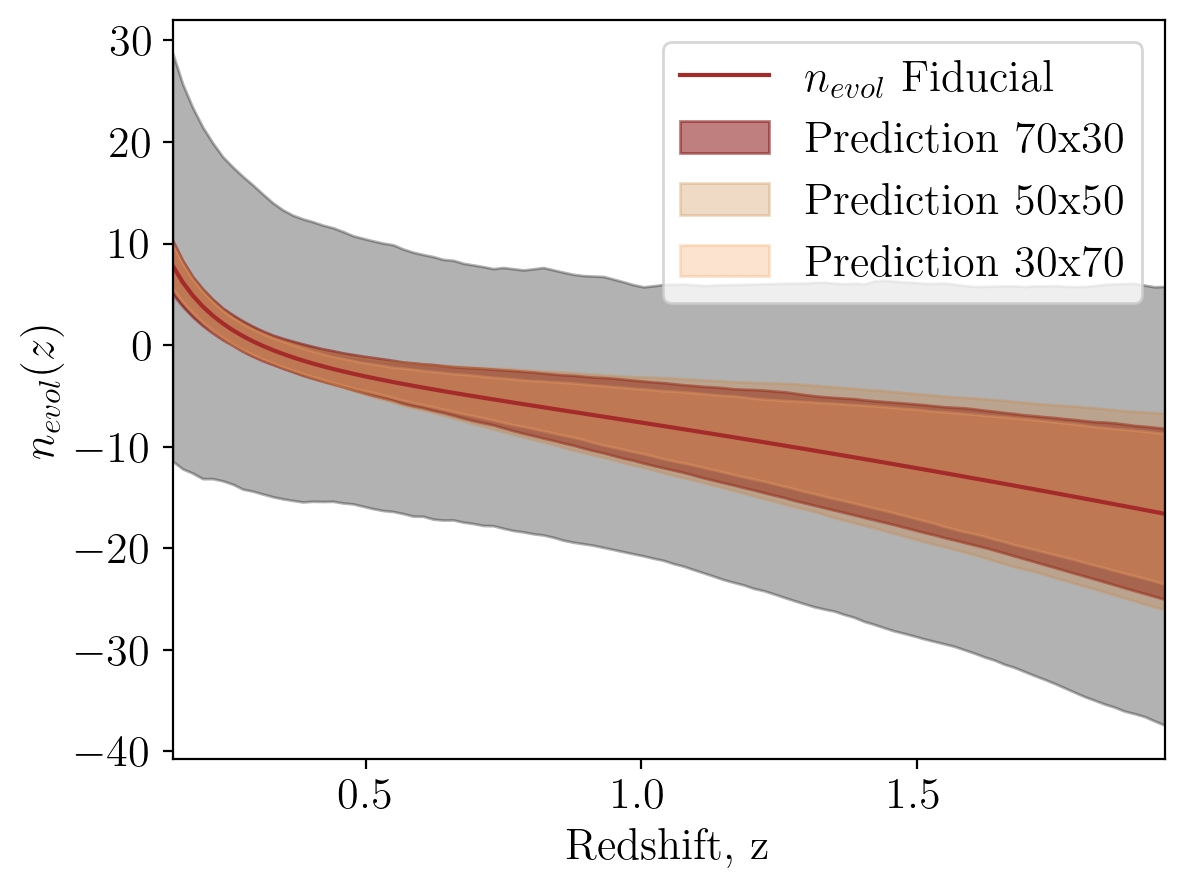

In [60]:
plt.plot(z_lin, num_evol_fid, '-', color='brown', label=r'$n_{evol}$'+' Fiducial', lw = 1.5)

# Shade the 68% confidence interval
plt.fill_between(z_lin, nevol_lower_bound_priors, nevol_upper_bound_priors, color='black', alpha=0.3)

plt.fill_between(z_lin, nevol_70_lower_bound, nevol_70_upper_bound, color='maroon', alpha=0.5, label='Prediction 70x30')
plt.fill_between(z_lin, nevol_50_lower_bound, nevol_50_upper_bound, color='peru', alpha=0.3, label='Prediction 50x50')
plt.fill_between(z_lin, nevol_30_lower_bound, nevol_30_upper_bound, color='sandybrown', alpha=0.3, label='Prediction 30x70')


plt.xlim(0.15,1.95)

plt.xlabel(r'Redshift, z')
plt.ylabel(r'$n_{evol}(z)$')
plt.legend();

In [61]:
width_nevol_50 = (nevol_50_upper_bound - nevol_50_lower_bound)
width_nevol_30 = (nevol_30_upper_bound - nevol_30_lower_bound)
width_nevol_70 = (nevol_70_upper_bound - nevol_70_lower_bound)

In [62]:
np.mean(width_nevol_50), np.median(width_nevol_50), np.max(width_nevol_30), np.max(width_nevol_50), np.max(width_nevol_70)

(9.745043695901755,
 9.468484256070427,
 14.832345408495845,
 19.331855686835706,
 16.82396150517598)

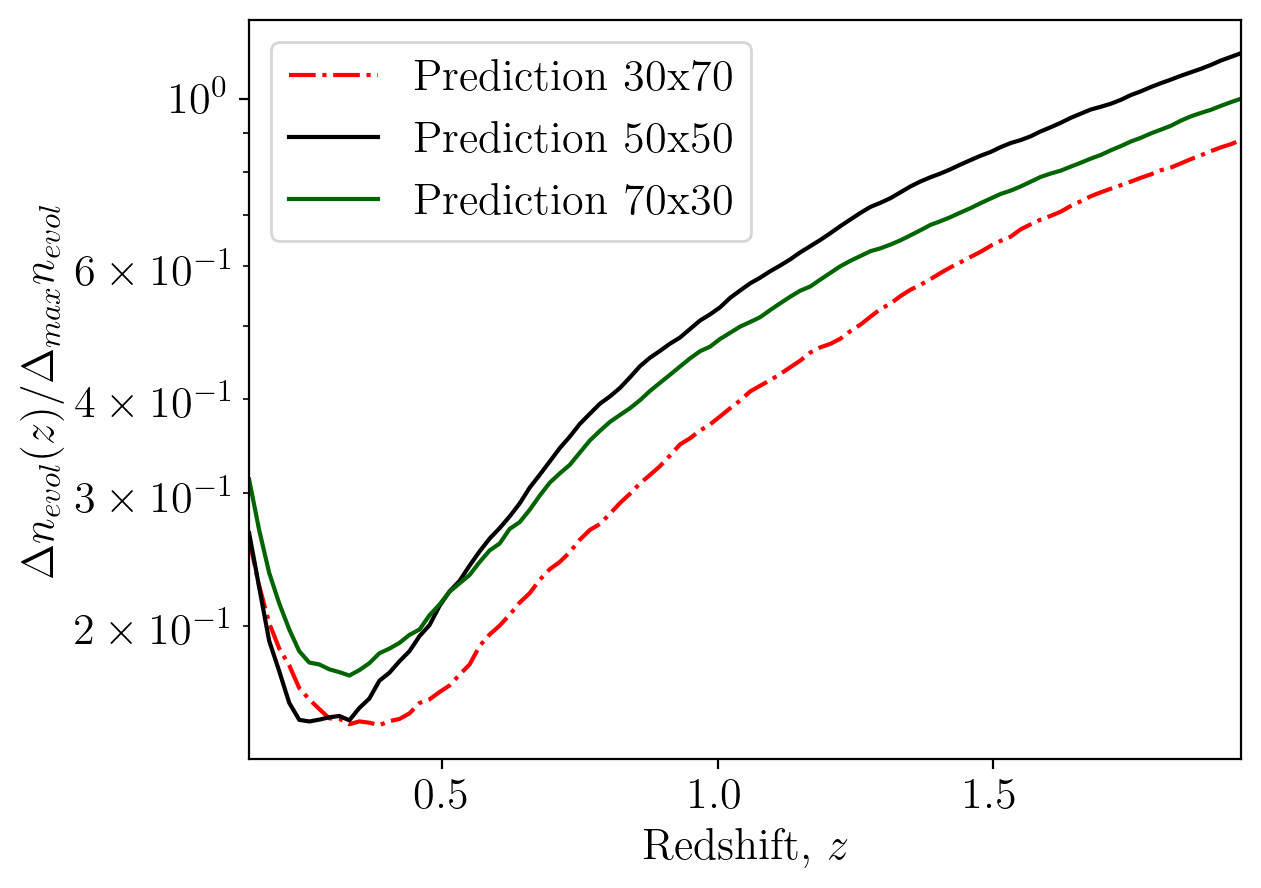

In [63]:
plt.plot(z_lin, width_nevol_30/np.max(width_nevol_70), '-.', lw = 1.5, color='red', label = 'Prediction 30x70')
plt.plot(z_lin, width_nevol_50/np.max(width_nevol_70), '-', lw = 1.5, color='black', label = 'Prediction 50x50')
plt.plot(z_lin, width_nevol_70/np.max(width_nevol_70), '-', lw = 1.5, color='darkgreen', label='Prediction 70x30')

plt.xlim(z_bins[0],z_bins[-1])
plt.yscale('log')
#plt.xscale('log')
plt.xlabel(r'Redshift, $z$');
plt.ylabel(r'$\Delta n_{evol}(z)/\Delta_{max} n_{evol}$');
plt.legend(loc='upper left');

## EVOLUTION BIAS

The evolution bias is computed from the magnification biases and the evolution of the number densities.

$$ f^{evol}_{B}(z) = -\frac{d\log{N_B(z)}}{d\log{(1+z)}} - \frac{d\log{H(z)}}{d\log{(1+z)}} + \frac{2(1+z)}{r(z)H(z)} -5\,s_B(z)\left(1+\frac{(1+z)}{r(z)H(z)}\right) - \frac{5}{2}s_B(z)\,\frac{d\log{F_c}}{d\log{(1+z)}} $$

$$ f^{evol}_{F}(z) = -\frac{d\log{N_F(z)}}{d\log{(1+z)}} - \frac{d\log{H(z)}}{d\log{(1+z)}} + \frac{2(1+z)}{r(z)H(z)} -5\,s_F(z)\left(1+\frac{(1+z)}{r(z)H(z)}\right) 
    - \frac{5}{2}\left[\frac{\bar{N}}{\bar{N}_F}\,s_{model}(z)\frac{d\log{F_*}}{d\log{(1+z)}}-\frac{\bar{N}_B}{\bar{N}_F}\,s_B(z)\frac{d\log{F_c}}{d\log{(1+z)}}\right] $$

We have all the ingredients defined as methods in the EvolutionBias class. We need to extract the relevant terms and then sample togeter the $n_{evol}$ and magnification bias parameters to construct the predictions for each evolution bias. 

In [64]:
myEvolBias_30 = EvolutionBias(n_split=m_split[0])
myEvolBias_50 = EvolutionBias(n_split=m_split[1])
myEvolBias_70 = EvolutionBias(n_split=m_split[2])


dlogH = myEvolBias_50.dlogH
rHterm = myEvolBias_50.rHterm
dFstar = myEvolBias_50.dLogFstar

dFcut = [myEvolBias_30.dLogFcut, myEvolBias_50.dLogFcut, myEvolBias_70.dLogFcut]

def fevol_bright(pars_s, pars_n, z, split):
    pars_sB = pars_s[:4] 
    return - nevol_fit(params=pars_n, x=z) - dlogH(z) + (2 - 5*magbias_fit(params=pars_sB, x=z))*rHterm(z) - 5*magbias_fit(params=pars_sB, x=z) - 5/2*magbias_fit(params=pars_sB, x=z)*dFcut[split](z)
    
def fevol_faint(pars_s, pars_n, z, split):
    
    pars_sB = pars_s[:4]
    pars_sM = pars_s[4:]
    s_B = magbias_fit(params=pars_sB, x=z)
    s_M = magbias_fit(params=pars_sM, x=z)
    s_faint = s_M*m_split[split]/(m_split[split]-1) - s_B/(m_split[split]-1)
    
    return - nevol_fit(params=pars_n, x=z) - dlogH(z) + (2 - 5*s_faint)*rHterm(z) - 5*s_faint + 5/2*((1/(m_split[split]-1)) * s_B *dFcut[split](z) - (m_split[split]/(m_split[split]-1)) * s_M *dFstar(z))

In [65]:
sbias_fid_30 = np.concatenate([sB_30, sF])
sbias_fid_50 = np.concatenate([sB_50, sF])
sbias_fid_70 = np.concatenate([sB_70, sF])

np.shape(sbias_fid_50), np.shape(sbias_fid_30), np.shape(sbias_fid_70)

((8,), (8,), (8,))

In [66]:
m_split

[3.3333333333333335, 2.0, 1.4285714285714286]

In [67]:
fevol_30_B_fid = fevol_bright(pars_s = sbias_fid_30, pars_n = nevol, z = z_lin, split = 0)
fevol_30_F_fid = fevol_faint(pars_s = sbias_fid_30, pars_n =  nevol, z = z_lin, split = 0)

fevol_50_B_fid = fevol_bright(pars_s = sbias_fid_50, pars_n = nevol, z = z_lin, split = 1)
fevol_50_F_fid = fevol_faint(pars_s = sbias_fid_50, pars_n = nevol, z = z_lin, split = 1)


fevol_70_B_fid = fevol_bright(pars_s = sbias_fid_70, pars_n = nevol, z = z_lin, split = 2)
fevol_70_F_fid = fevol_faint(pars_s = sbias_fid_70, pars_n =  nevol, z = z_lin, split = 2)

In [68]:
# Select the marginalized covariance matrix for the parameters

cov_all_30x70 = Sigma_Matrix_30x70[:12, :12]
cov_all_50x50 = Sigma_Matrix_50x50[:12, :12]
cov_all_70x30 = Sigma_Matrix_70x30[:12, :12]


cov_all_30_priors = Cov_all_30[:12, :12]
cov_all_50_priors = Cov_all_50[:12, :12]
cov_all_70_priors = Cov_all_70[:12, :12]

all_fid_30 = np.concatenate([sbias_fid_30, nevol])
all_fid_50 = np.concatenate([sbias_fid_50, nevol])
all_fid_70 = np.concatenate([sbias_fid_70, nevol])

# Generate parameter samples from multivariate normal distribution

num_samples = 1000
all_30_pars_samples = np.random.multivariate_normal(all_fid_30, cov_all_30x70, num_samples)
all_50_pars_samples = np.random.multivariate_normal(all_fid_50, cov_all_50x50, num_samples)
all_70_pars_samples = np.random.multivariate_normal(all_fid_70, cov_all_70x30, num_samples)

all_30_pars_samples_priors = np.random.multivariate_normal(all_fid_30, cov_all_30_priors, num_samples)
all_50_pars_samples_priors = np.random.multivariate_normal(all_fid_50, cov_all_50_priors, num_samples)
all_70_pars_samples_priors = np.random.multivariate_normal(all_fid_70, cov_all_70_priors, num_samples)

# Evaluate fitting function for each parameter sample

fevol_30_B_samples = np.array([fevol_bright(pars_s = pars[:8], pars_n = pars[8:12], z = z_lin, split = 0) for pars in all_30_pars_samples])
fevol_30_B_samples_priors_ = np.array([fevol_bright(pars_s = pars[:8], pars_n = pars[8:12], z = z_lin, split = 0) for pars in all_30_pars_samples_priors])
fevol_30_F_samples = np.array([fevol_faint(pars_s = pars[:8], pars_n = pars[8:12], z = z_lin, split = 0) for pars in all_30_pars_samples])
fevol_30_F_samples_priors_ = np.array([fevol_faint(pars_s = pars[:8], pars_n = pars[8:12], z = z_lin, split = 0) for pars in all_30_pars_samples_priors])

fevol_50_B_samples = np.array([fevol_bright(pars_s = pars[:8], pars_n = pars[8:12], z = z_lin, split = 1) for pars in all_50_pars_samples])
fevol_50_B_samples_priors_ = np.array([fevol_bright(pars_s = pars[:8], pars_n = pars[8:12], z = z_lin, split = 1) for pars in all_50_pars_samples_priors])
fevol_50_F_samples = np.array([fevol_faint(pars_s = pars[:8], pars_n = pars[8:12], z = z_lin, split = 1) for pars in all_50_pars_samples])
fevol_50_F_samples_priors_ = np.array([fevol_faint(pars_s = pars[:8], pars_n = pars[8:12], z = z_lin, split = 1) for pars in all_50_pars_samples_priors])

fevol_70_B_samples = np.array([fevol_bright(pars_s = pars[:8], pars_n = pars[8:12], z = z_lin, split = 2) for pars in all_70_pars_samples])
fevol_70_B_samples_priors_ = np.array([fevol_bright(pars_s = pars[:8], pars_n = pars[8:12], z = z_lin, split = 2) for pars in all_70_pars_samples_priors])
fevol_70_F_samples = np.array([fevol_faint(pars_s = pars[:8], pars_n = pars[8:12], z = z_lin, split = 2) for pars in all_70_pars_samples])
fevol_70_F_samples_priors_ = np.array([fevol_faint(pars_s = pars[:8], pars_n = pars[8:12], z = z_lin, split = 2) for pars in all_70_pars_samples_priors])

# Calculate the 68% confidence intervals

fevol_B_30_lower_bound_ = np.percentile(fevol_30_B_samples, 16, axis=0)
fevol_B_30_upper_bound_ = np.percentile(fevol_30_B_samples, 84, axis=0)
fevol_B_30_lower_bound_priors_ = np.percentile(fevol_30_B_samples_priors_, 16, axis=0)
fevol_B_30_upper_bound_priors_ = np.percentile(fevol_30_B_samples_priors_, 84, axis=0)

fevol_F_30_lower_bound_ = np.percentile(fevol_30_F_samples, 16, axis=0)
fevol_F_30_upper_bound_ = np.percentile(fevol_30_F_samples, 84, axis=0)
fevol_F_30_lower_bound_priors_ = np.percentile(fevol_30_F_samples_priors_, 16, axis=0)
fevol_F_30_upper_bound_priors_ = np.percentile(fevol_30_F_samples_priors_, 84, axis=0)

fevol_B_50_lower_bound_ = np.percentile(fevol_50_B_samples, 16, axis=0)
fevol_B_50_upper_bound_ = np.percentile(fevol_50_B_samples, 84, axis=0)
fevol_B_50_lower_bound_priors_ = np.percentile(fevol_50_B_samples_priors_, 16, axis=0)
fevol_B_50_upper_bound_priors_ = np.percentile(fevol_50_B_samples_priors_, 84, axis=0)

fevol_F_50_lower_bound_ = np.percentile(fevol_50_F_samples, 16, axis=0)
fevol_F_50_upper_bound_ = np.percentile(fevol_50_F_samples, 84, axis=0)
fevol_F_50_lower_bound_priors_ = np.percentile(fevol_50_F_samples_priors_, 16, axis=0)
fevol_F_50_upper_bound_priors_ = np.percentile(fevol_50_F_samples_priors_, 84, axis=0)

fevol_B_70_lower_bound_ = np.percentile(fevol_70_B_samples, 16, axis=0)
fevol_B_70_upper_bound_ = np.percentile(fevol_70_B_samples, 84, axis=0)
fevol_B_70_lower_bound_priors_ = np.percentile(fevol_70_B_samples_priors_, 16, axis=0)
fevol_B_70_upper_bound_priors_ = np.percentile(fevol_70_B_samples_priors_, 84, axis=0)

fevol_F_70_lower_bound_ = np.percentile(fevol_70_F_samples, 16, axis=0)
fevol_F_70_upper_bound_ = np.percentile(fevol_70_F_samples, 84, axis=0)
fevol_F_70_lower_bound_priors_ = np.percentile(fevol_70_F_samples_priors_, 16, axis=0)
fevol_F_70_upper_bound_priors_ = np.percentile(fevol_70_F_samples_priors_, 84, axis=0)

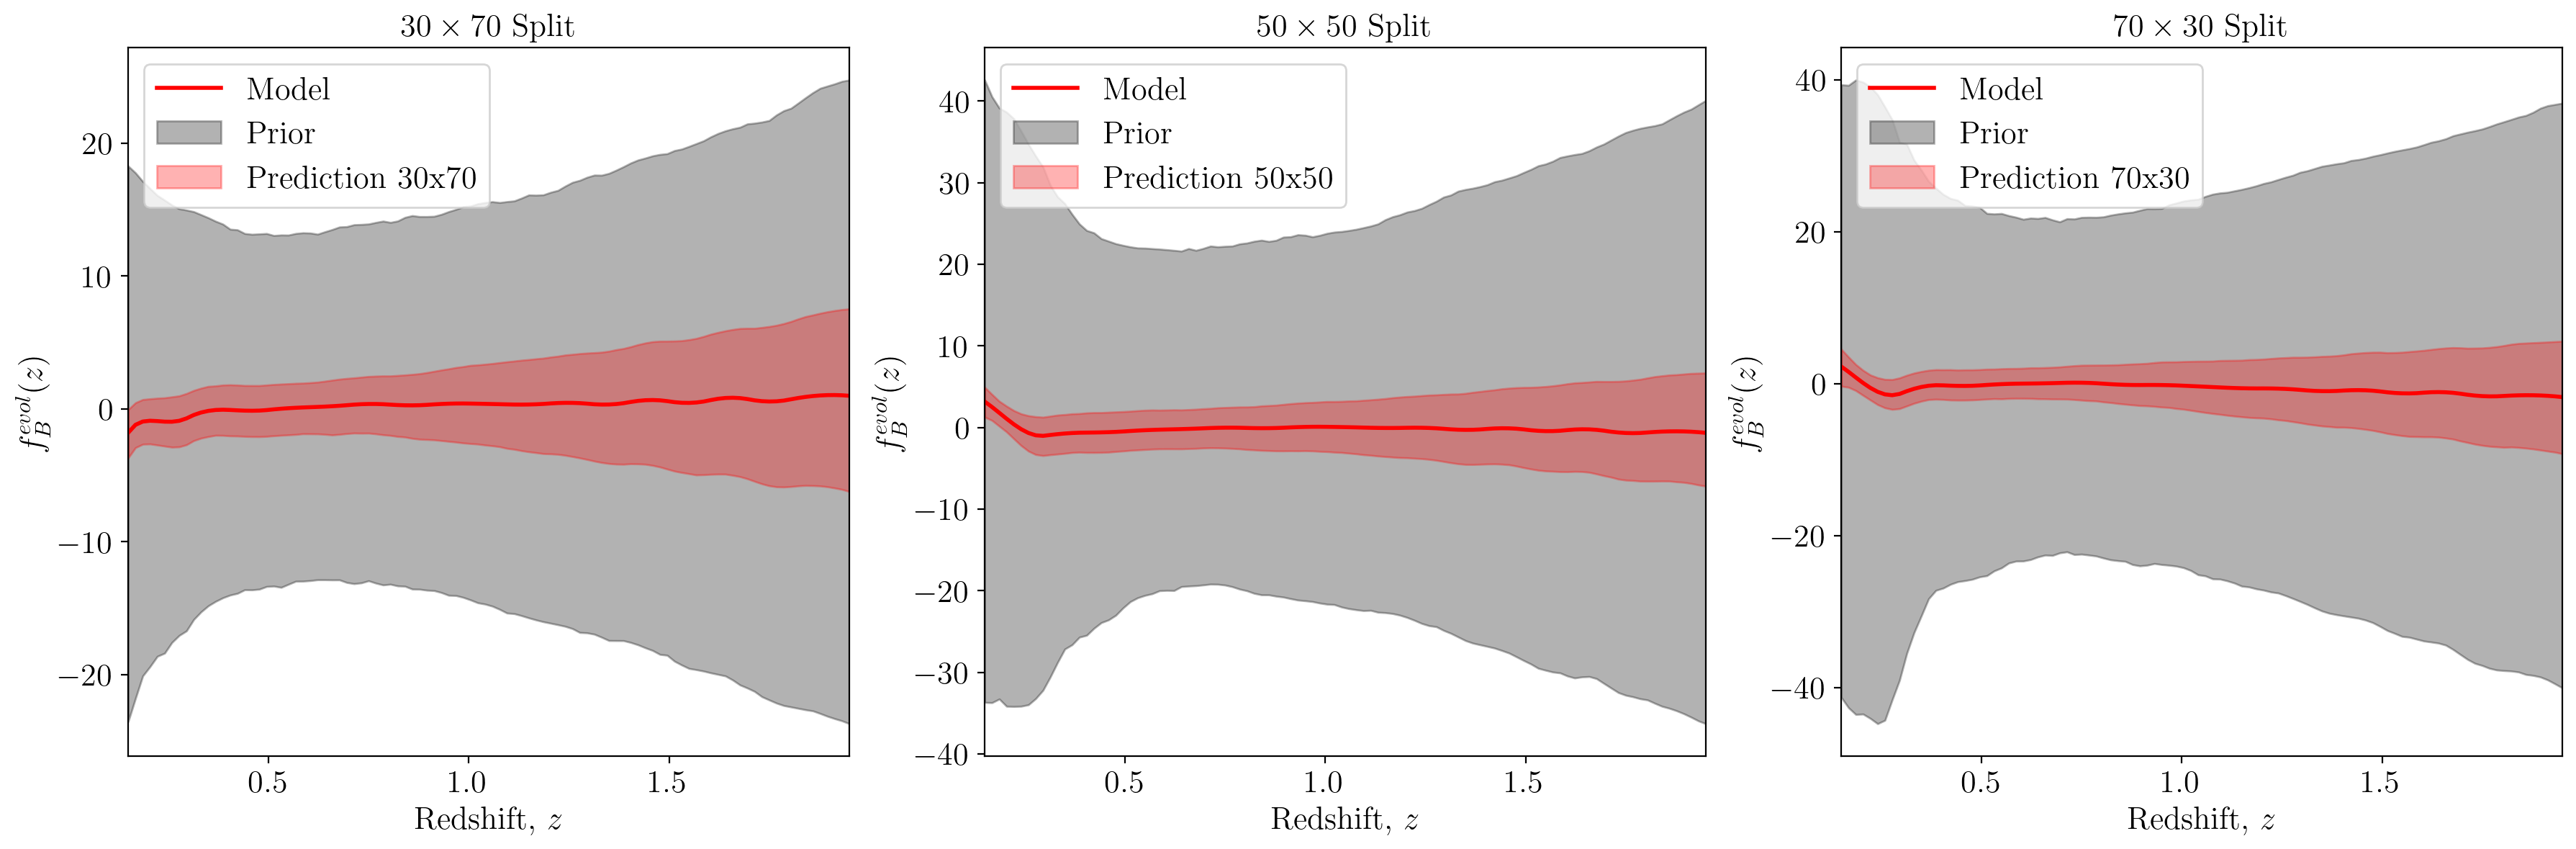

In [69]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(18,6), tight_layout=True)

ax[0].plot(z_lin, fevol_30_B_fid, '-', color='red', lw = 2.0, label = 'Model')
ax[1].plot(z_lin, fevol_50_B_fid, '-', color='red', lw = 2.0, label = 'Model')
ax[2].plot(z_lin, fevol_70_B_fid, '-', color='red', lw = 2.0, label = 'Model')

# Shade the 68% confidence interval

ax[0].fill_between(z_lin, fevol_B_30_lower_bound_priors_, fevol_B_30_upper_bound_priors_, color='black', alpha=0.3, label = 'Prior')
ax[0].fill_between(z_lin, fevol_B_30_lower_bound_, fevol_B_30_upper_bound_, color='red', alpha=0.3, label = 'Prediction 30x70')
ax[0].set_title(r'$30\times 70$ Split')


ax[1].fill_between(z_lin, fevol_B_50_lower_bound_priors_, fevol_B_50_upper_bound_priors_, color='black', alpha=0.3, label = 'Prior')
ax[1].fill_between(z_lin, fevol_B_50_lower_bound_, fevol_B_50_upper_bound_, color='red', alpha=0.3, label = 'Prediction 50x50')
ax[1].set_title(r'$50\times 50$ Split')


ax[2].fill_between(z_lin, fevol_B_70_lower_bound_priors_, fevol_B_70_upper_bound_priors_, color='black', alpha=0.3, label = 'Prior')
ax[2].fill_between(z_lin, fevol_B_70_lower_bound_, fevol_B_70_upper_bound_, color='red', alpha=0.3, label = 'Prediction 70x30')
ax[2].set_title(r'$70\times 30$ Split')


for axi in ax:
    axi.set_xlim(0.15,1.95)
    #axi.set_ylim(-20, 20)
    axi.set_xlabel(r'Redshift, $z$')
    axi.set_ylabel(r'$f^{evol}_B(z)$')
    axi.legend(loc='upper left')
    
#plt.savefig("plots/fevolB_prediction_joint_shotnoise_vs_prior.pdf", bbox_inches='tight', format='pdf')

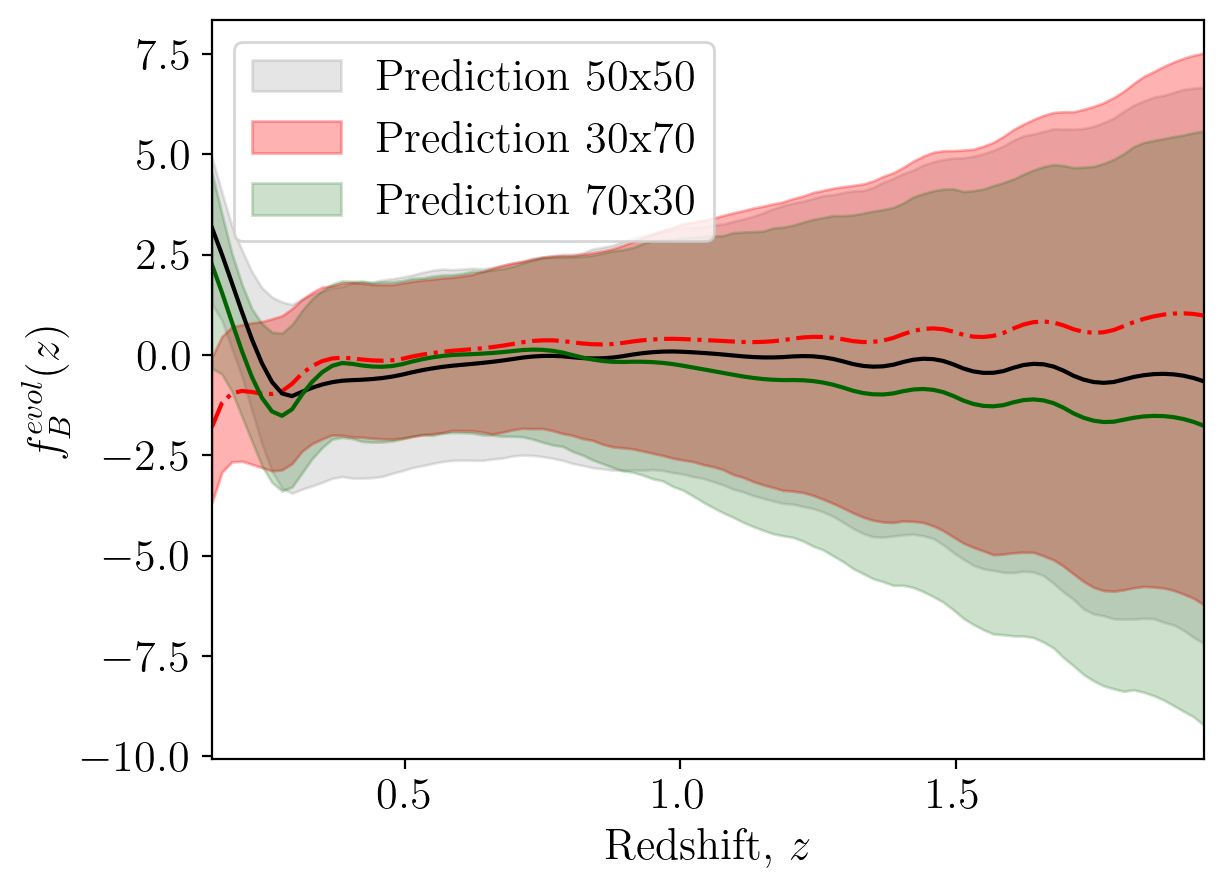

In [70]:
plt.plot(z_lin, fevol_30_B_fid, '-.', lw = 1.5, color='red')
plt.plot(z_lin, fevol_50_B_fid, '-', lw = 1.5, color='black')
plt.plot(z_lin, fevol_70_B_fid, '-', lw = 1.5, color='darkgreen')

plt.fill_between(z_lin, fevol_B_50_lower_bound_, fevol_B_50_upper_bound_, color='black', alpha=0.1, label='Prediction 50x50')
plt.fill_between(z_lin, fevol_B_30_lower_bound_, fevol_B_30_upper_bound_, color='red', alpha=0.3, label='Prediction 30x70')
plt.fill_between(z_lin, fevol_B_70_lower_bound_, fevol_B_70_upper_bound_, color='darkgreen', alpha=0.2, label='Prediction 70x30')

plt.xlim(z_bins[0],z_bins[-1])
plt.xlabel(r'Redshift, $z$');
plt.ylabel(r'$f^{evol}_B(z)$');
plt.legend(loc='upper left');

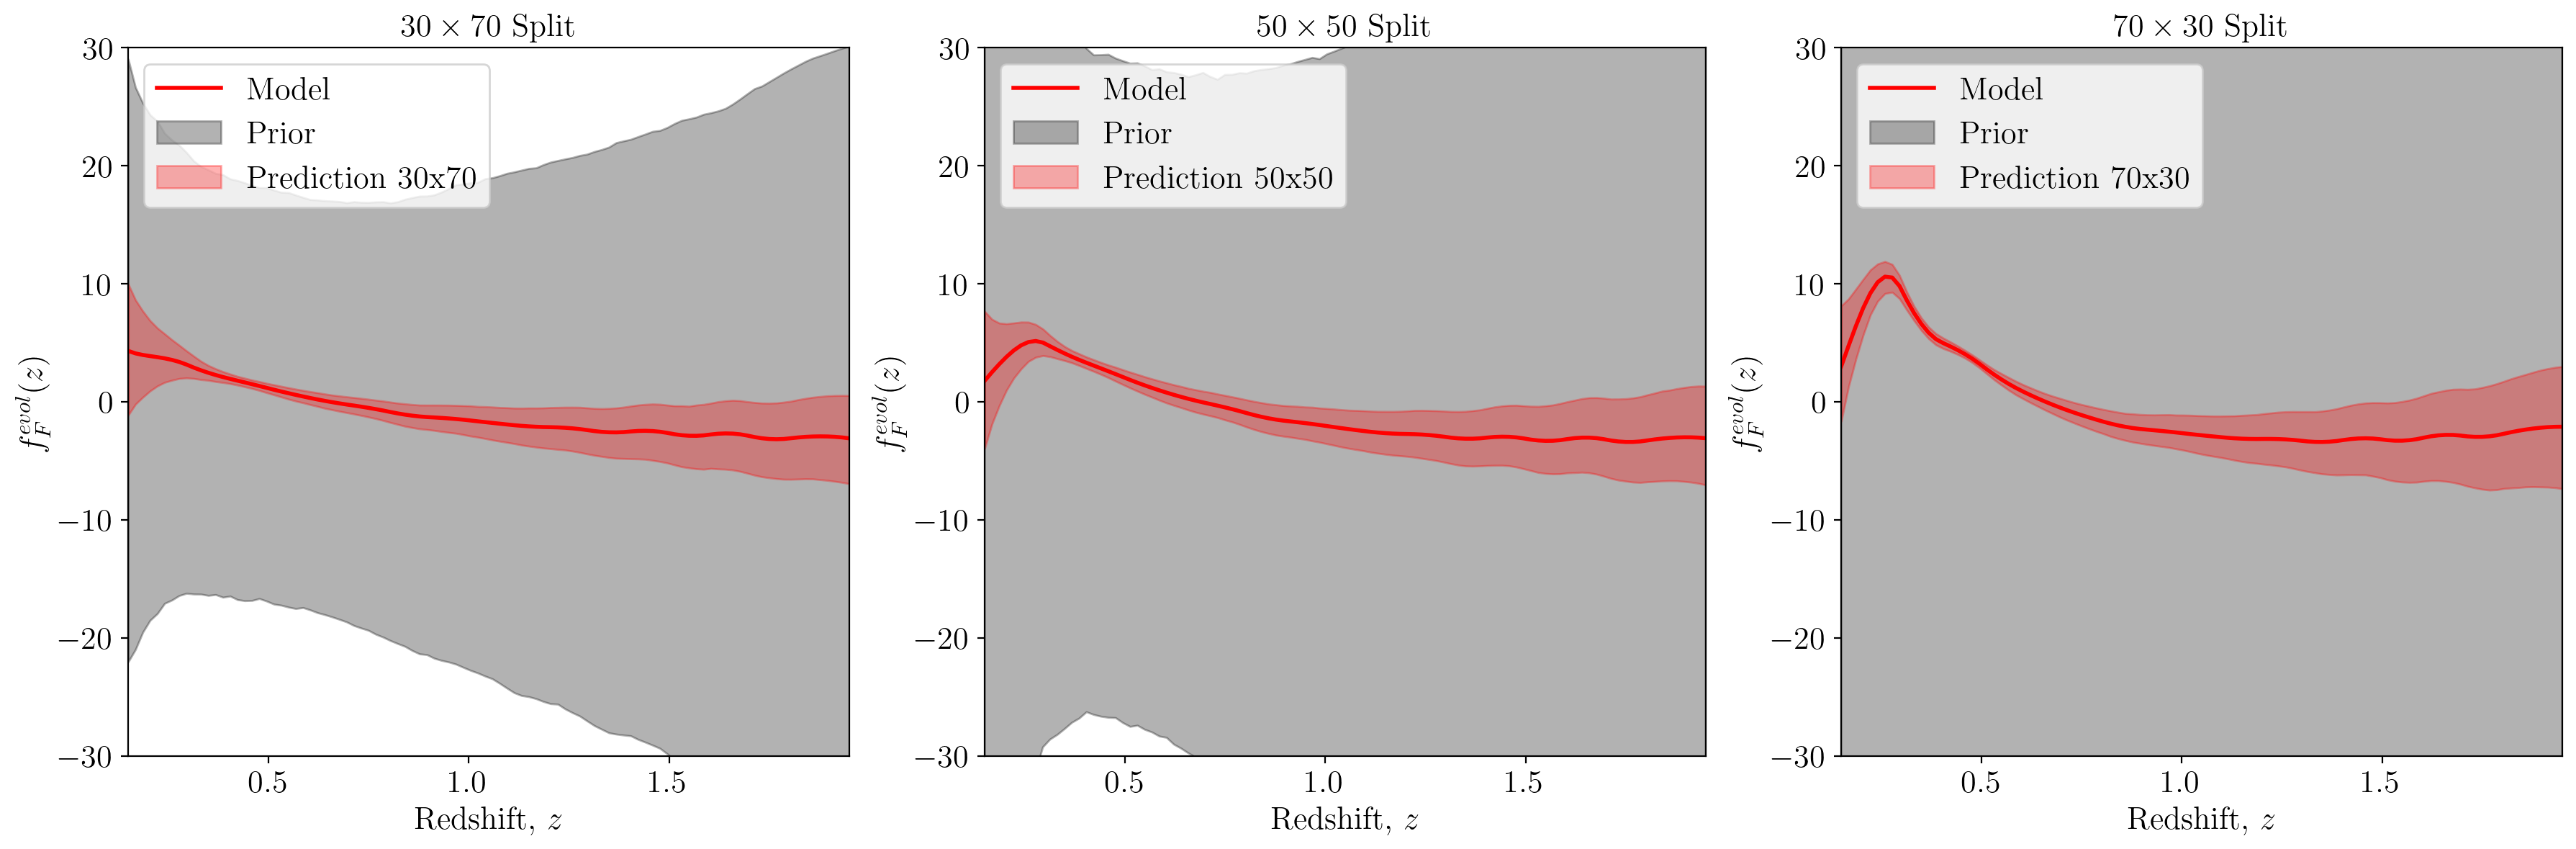

In [79]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(18,6), tight_layout=True)

ax[0].plot(z_lin, fevol_30_F_fid, '-', color='red', lw = 2.0, label = 'Model')
ax[1].plot(z_lin, fevol_50_F_fid, '-', color='red', lw = 2.0, label = 'Model')
ax[2].plot(z_lin, fevol_70_F_fid, '-', color='red', lw = 2.0, label = 'Model')

# Shade the 68% confidence interval

ax[0].fill_between(z_lin, fevol_F_30_lower_bound_priors_, fevol_F_30_upper_bound_priors_, color='black', alpha=0.3, label = 'Prior')
ax[0].fill_between(z_lin, fevol_F_30_lower_bound_, fevol_F_30_upper_bound_, color='red', alpha=0.3, label = 'Prediction 30x70')
ax[0].set_title(r'$30\times 70$ Split')


ax[1].fill_between(z_lin, fevol_F_50_lower_bound_priors_, fevol_F_50_upper_bound_priors_, color='black', alpha=0.3, label = 'Prior')
ax[1].fill_between(z_lin, fevol_F_50_lower_bound_, fevol_F_50_upper_bound_, color='red', alpha=0.3, label = 'Prediction 50x50')
ax[1].set_title(r'$50\times 50$ Split')


ax[2].fill_between(z_lin, fevol_F_70_lower_bound_priors_, fevol_F_70_upper_bound_priors_, color='black', alpha=0.3, label = 'Prior')
ax[2].fill_between(z_lin, fevol_F_70_lower_bound_, fevol_F_70_upper_bound_, color='red', alpha=0.3, label = 'Prediction 70x30')
ax[2].set_title(r'$70\times 30$ Split')


for axi in ax:
    axi.set_xlim(0.15,1.95)
    axi.set_ylim(-30, 30)
    axi.set_xlabel(r'Redshift, $z$')
    axi.set_ylabel(r'$f^{evol}_F(z)$')
    axi.legend(loc='upper left')

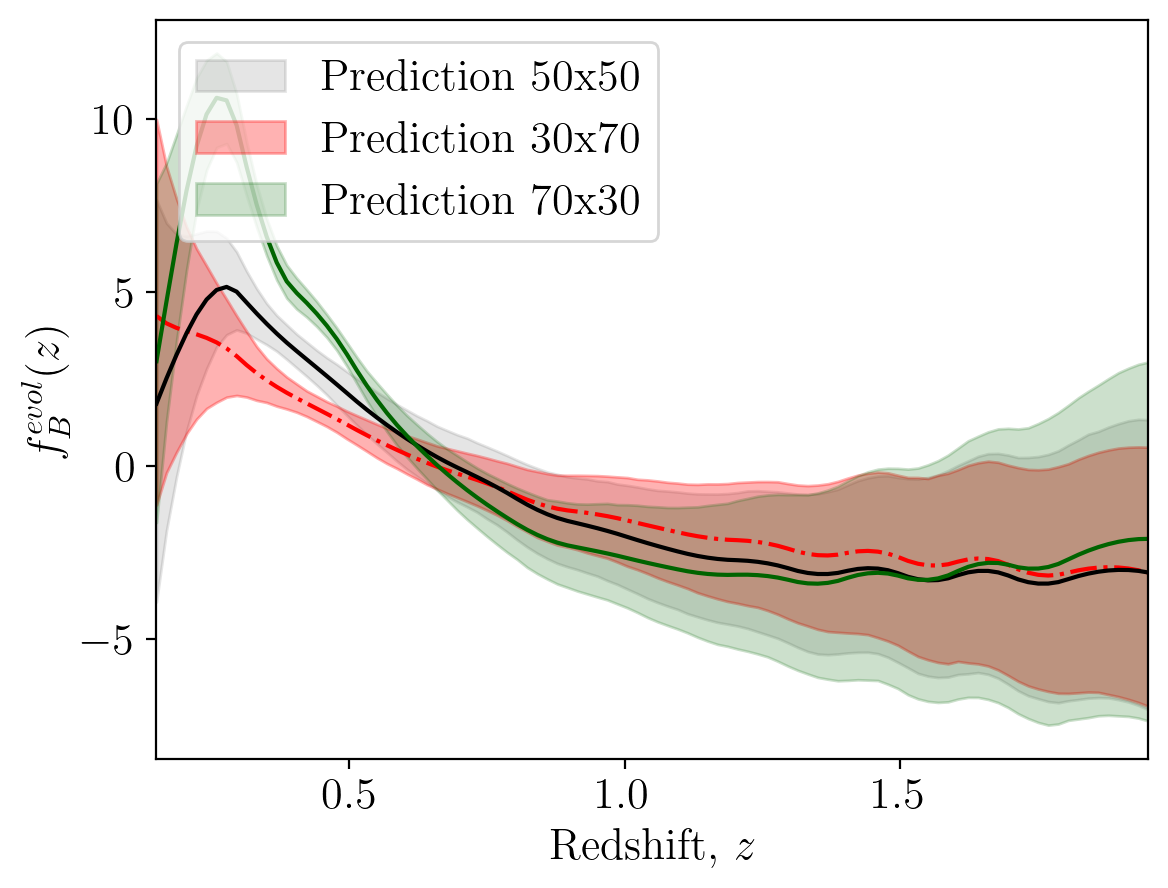

In [72]:
plt.plot(z_lin, fevol_30_F_fid, '-.', lw = 1.5, color='red')
plt.plot(z_lin, fevol_50_F_fid, '-', lw = 1.5, color='black')
plt.plot(z_lin, fevol_70_F_fid, '-', lw = 1.5, color='darkgreen')

plt.fill_between(z_lin, fevol_F_50_lower_bound_, fevol_F_50_upper_bound_, color='black', alpha=0.1, label='Prediction 50x50')
plt.fill_between(z_lin, fevol_F_30_lower_bound_, fevol_F_30_upper_bound_, color='red', alpha=0.3, label='Prediction 30x70')
plt.fill_between(z_lin, fevol_F_70_lower_bound_, fevol_F_70_upper_bound_, color='darkgreen', alpha=0.2, label='Prediction 70x30')

plt.xlim(z_bins[0],z_bins[-1])
plt.xlabel(r'Redshift, $z$');
plt.ylabel(r'$f^{evol}_B(z)$');
plt.legend(loc='upper left');

In [73]:
width_fevol_B_50 = (fevol_B_50_upper_bound_ - fevol_B_50_lower_bound_)
width_fevol_B_30 = (fevol_B_30_upper_bound_ - fevol_B_30_lower_bound_)
width_fevol_B_70 = (fevol_B_70_upper_bound_ - fevol_B_70_lower_bound_)

In [74]:
np.mean(width_fevol_B_50), np.median(width_fevol_B_50), np.max(width_fevol_B_50), np.max(width_fevol_B_30), np.max(width_fevol_B_70)

(7.446528541870978,
 6.3309168086074425,
 13.857579248540596,
 13.741944018725825,
 14.804589738569048)

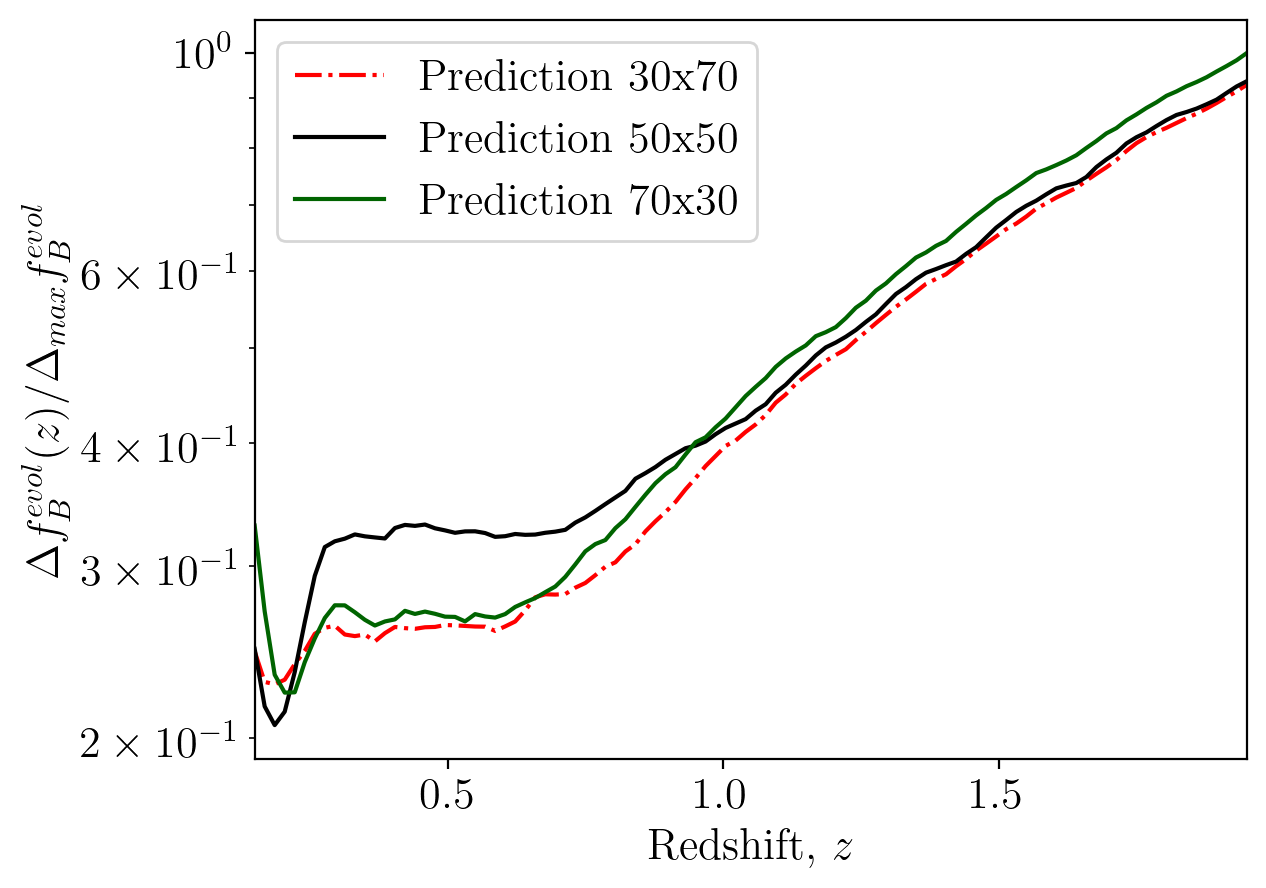

In [75]:
plt.plot(z_lin, width_fevol_B_30/np.max(width_fevol_B_70), '-.', lw = 1.5, color='red', label = 'Prediction 30x70')
plt.plot(z_lin, width_fevol_B_50/np.max(width_fevol_B_70), '-', lw = 1.5, color='black', label = 'Prediction 50x50')
plt.plot(z_lin, width_fevol_B_70/np.max(width_fevol_B_70), '-', lw = 1.5, color='darkgreen', label='Prediction 70x30')

plt.xlim(z_bins[0],z_bins[-1])
plt.yscale('log')
#plt.xscale('log')
plt.xlabel(r'Redshift, $z$');
plt.ylabel(r'$\Delta f^{evol}_B(z)/\Delta_{max} f^{evol}_B$');
plt.legend(loc='upper left');

In [76]:
width_fevol_F_50 = (fevol_F_50_upper_bound_ - fevol_F_50_lower_bound_)
width_fevol_F_30 = (fevol_F_30_upper_bound_ - fevol_F_30_lower_bound_)
width_fevol_F_70 = (fevol_F_70_upper_bound_ - fevol_F_70_lower_bound_)

In [77]:
np.mean(width_fevol_F_50), np.median(width_fevol_F_50), np.max(width_fevol_F_50), np.max(width_fevol_F_30), np.max(width_fevol_F_70)

(4.0784552364224975,
 3.664846295627598,
 11.589271803300232,
 11.11423634193671,
 10.35065658592347)

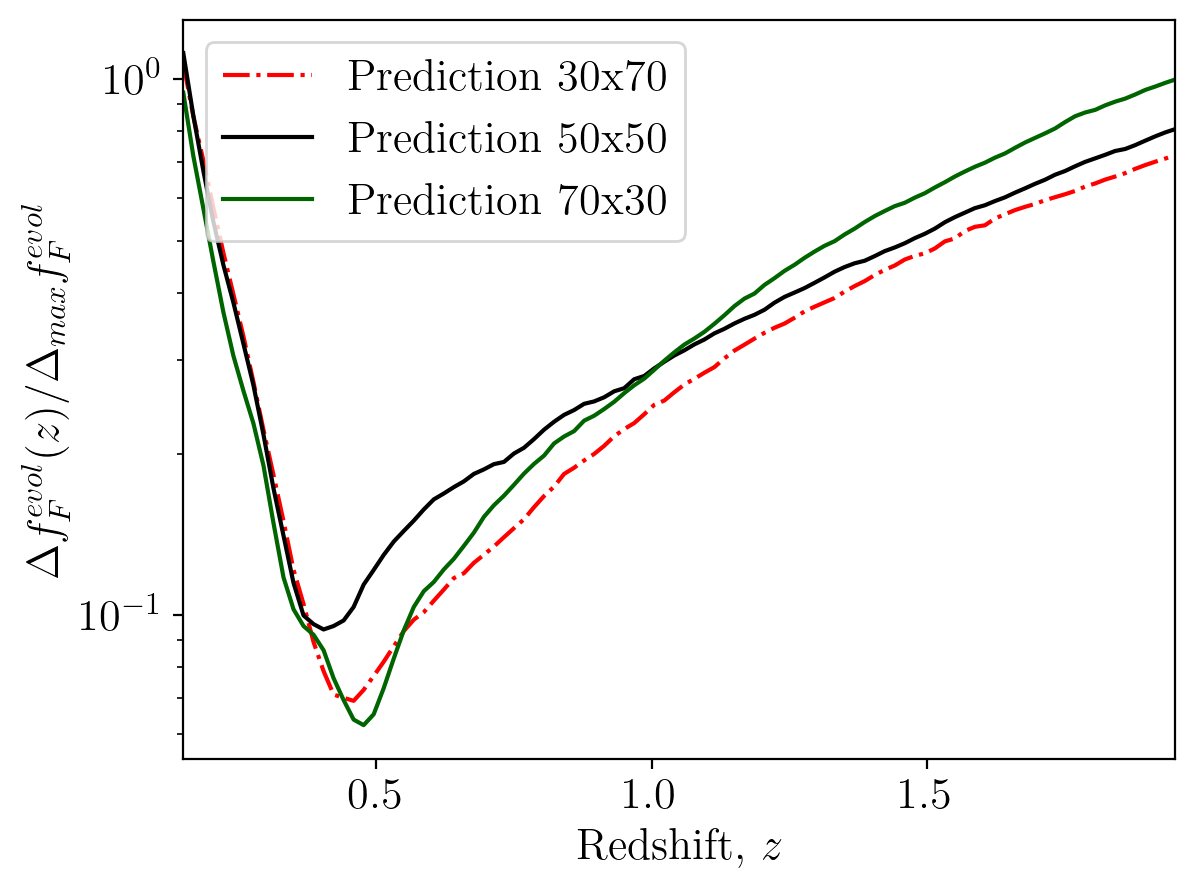

In [78]:
plt.plot(z_lin, width_fevol_F_30/np.max(width_fevol_F_70), '-.', lw = 1.5, color='red', label = 'Prediction 30x70')
plt.plot(z_lin, width_fevol_F_50/np.max(width_fevol_F_70), '-', lw = 1.5, color='black', label = 'Prediction 50x50')
plt.plot(z_lin, width_fevol_F_70/np.max(width_fevol_F_70), '-', lw = 1.5, color='darkgreen', label='Prediction 70x30')

plt.xlim(z_bins[0],z_bins[-1])
plt.yscale('log')
#plt.xscale('log')
plt.xlabel(r'Redshift, $z$');
plt.ylabel(r'$\Delta f^{evol}_F(z)/\Delta_{max} f^{evol}_F$');
plt.legend(loc='upper left');